<a href="https://colab.research.google.com/github/Ssdosaofc/ML-model-from-scratch/blob/main/K_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/ML/Kmean_dataset.csv")

In [ ]:
train.head()

feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0     14.23      1.71      2.43      15.6       127      2.80      3.06   
1     13.20      1.78      2.14      11.2       100      2.65      2.76   
2     13.16      2.36      2.67      18.6       101      2.80      3.24   
3     14.37      1.95      2.50      16.8       113      3.85      3.49   
4     13.24      2.59      2.87      21.0       118      2.80      2.69   

   feature7  feature8  feature9  feature10  feature11  feature12  
0      0.28      2.29      5.64       1.04       3.92       1065  
1      0.26      1.28      4.38       1.05       3.40       1050  
2      0.30      2.81      5.68       1.03       3.17       1185  
3      0.24      2.18      7.80       0.86       3.45       1480  
4      0.39      1.82      4.32       1.04       2.93        735

In [ ]:
def min_max_scaling(x):
  x_norm = ((x - x.min())/(x.max()-x.min()))*10 +1
  return x_norm

In [ ]:
train_norm = min_max_scaling(train)
train_norm.head()

feature0  feature1  feature2  feature3  feature4   feature5  feature6  \
0  9.421053  2.916996  6.721925  3.577320  7.195652   7.275862  6.738397   
1  6.710526  3.055336  5.171123  1.309278  4.260870   6.758621  6.105485   
2  6.605263  4.201581  8.005348  5.123711  4.369565   7.275862  7.118143   
3  9.789474  3.391304  7.096257  4.195876  5.673913  10.896552  7.645570   
4  6.815789  4.656126  9.074866  6.360825  6.217391   7.275862  5.957806   

   feature7  feature8  feature9  feature10  feature11  feature12  
0  3.830189  6.930599  4.720137   5.552846  10.706960   6.613409  
1  3.452830  3.744479  3.645051   5.634146   8.802198   6.506419  
2  4.207547  8.570978  4.754266   5.471545   7.959707   7.469330  
3  3.075472  6.583596  6.563140   4.089431   8.985348   9.573466  
4  5.905660  5.447950  3.593857   5.552846   7.080586   4.259629

# PCA

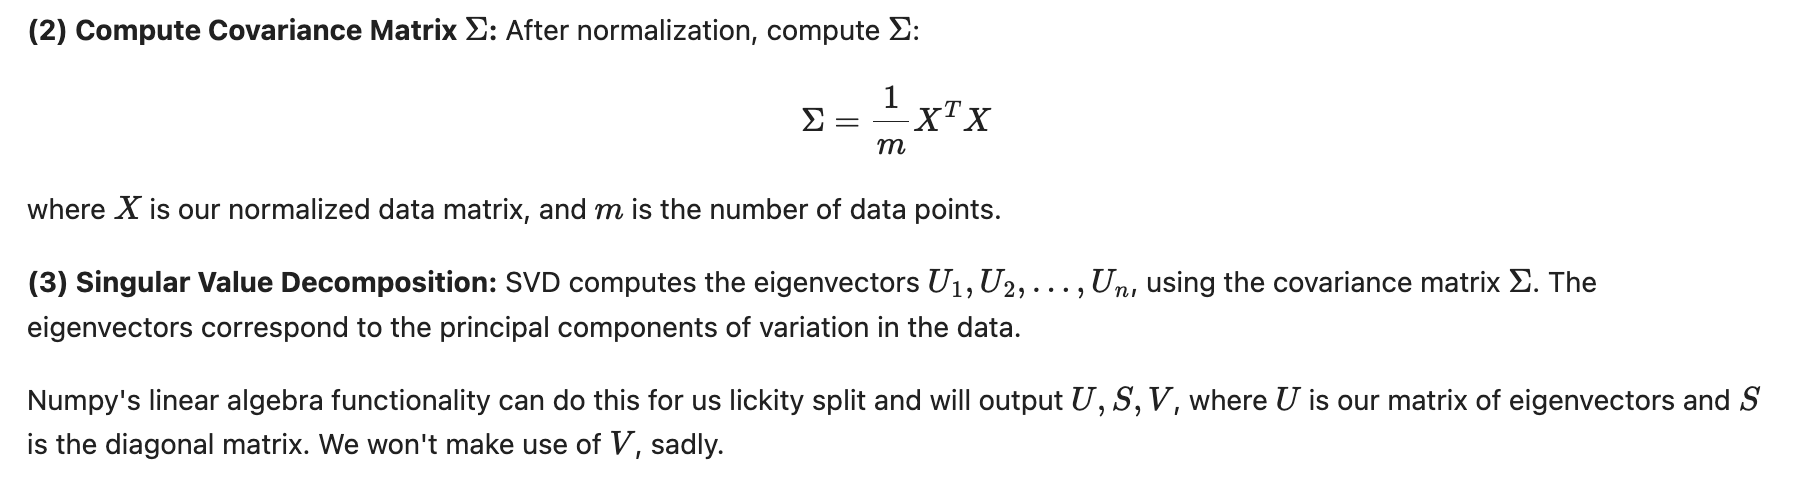

In [ ]:
def normalize_features(x):
    mean = np.mean(x, axis=0)
    std_dev = np.std(x, axis=0)
    normalized_x = (x - mean) / std_dev
    return normalized_x, mean, std_dev

In [ ]:
def implement_pca(x):
  cov_matrix = x.T.dot(x)/x.shape[0]
  U,S,V = np.linalg.svd(cov_matrix,full_matrices=True,compute_uv=True)

  return U,S,V

In [ ]:
normalized_train, mean, std_dev = normalize_features(train)
U,S,V = implement_pca(normalized_train)

In [35]:
def plotPca(X, mean, S, U, X_rec, X_normed = False):

    plt.figure(figsize = (12, 8))
    plot = plt.scatter(X[:, 0], X[:, 1], s = 30, facecolors='none', edgecolors = 'b', label = "2-Dimensional Data")
    plt.grid(True)

    if X_normed == False:

        plt.title("Toy Data with Eigenvectors from PCA", fontsize = 20)
        plt.xlabel('x1', fontsize = 15)
        plt.ylabel('x2', fontsize = 15)
        plt.plot([mean[0], mean[0] + 1.5 * S[0] * U[0, 0]], [mean[1], mean[1] +  1.5 * S[0] * U[0, 1]],
            color = 'black', linewidth = 2, label = 'First Principal Component')
        plt.plot([mean[0], mean[0] + 1.5 * S[1] * U[1, 0]], [mean[1], mean[1] + 2 * S[1] * U[1, 1]],
            color = 'green', linewidth = 2, label= 'Second Principal Component')
        plt.legend()

    else:

        plot = plt.scatter(X_rec[:, 0], X_rec[:, 1], s = 30, facecolors = 'none', edgecolors = 'r',
                           label = 'Data Projected to Lower Dimension')
        plt.title("Toy Data: Dimensionality Reduced", fontsize = 20)
        plt.xlabel('Normalized x1', fontsize = 15)
        plt.ylabel('Normalized x2', fontsize = 15)
        plt.legend()

        for i in np.arange(X.shape[0]):
            plt.plot([X[i, 0], X_rec[i, 0]], [X[i, 1], X_rec[i, 1]], 'k--')

In [36]:
plot_Pca(normalized_train, mean, S, U, normalized_train)

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1200x800 with 0 Axes>

# Model

In [ ]:
def random_centroids(train,k):
  centroids=[]
  for i in range(k):
    centroid = train.apply(lambda x: float(x.sample().iloc[0]))
    centroids.append(centroid)

  return pd.concat(centroids,axis=1)

In [ ]:
def get_distance(train,centroids):
  distances = centroids.apply(lambda x: np.sqrt(((train - x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [ ]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [ ]:
#For elbow method
def cost_function(train,centroids,labels):
  a,b = train.shape
  cost = 0.
  for i in range(a):
    cost += np.sum((train[i] - centroids[labels[i]])**2)

  cost = cost/a

  return cost

In [ ]:
train_array = np.array(train)

In [92]:
max_iters=100
k = 3

centroids = random_centroids(train_norm,k)
old_centroids = pd.DataFrame()
labels = get_distance(train_norm,centroids)

In [93]:
labels

0      2
1      2
2      0
3      2
4      2
      ..
173    1
174    1
175    0
176    0
177    1
Length: 178, dtype: int64

In [94]:
labels.value_counts()

2    66
0    63
1    49
Name: count, dtype: int64

In [95]:
i=1

In [96]:
while i<max_iters and not centroids.equals(old_centroids):
    old_centroids= centroids
    labels = get_distance(train_norm,centroids)
    centroids = new_centroids(train_norm,labels,k)
    i+=1

In [97]:
i

11

In [98]:
centroids

0         1         2
feature0   7.862725  6.298255  3.785308
feature1   3.218958  5.231922  2.984019
feature2   6.640293  6.520030  5.444631
feature3   4.220827  6.253621  5.758469
feature4   4.778286  3.941537  3.272390
feature5   7.381902  3.223954  5.117554
feature6   6.521598  1.963588  4.515877
feature7   3.751776  6.701130  4.708876
feature8   5.639060  3.026036  4.620346
feature9   4.376562  5.429631  2.320540
feature10  5.732564  2.699426  5.450214
feature11  7.779265  2.416709  6.676713
feature12  6.473370  3.361373  2.380792

In [99]:
labels.value_counts()

0    64
2    59
1    55
Name: count, dtype: int64

In [53]:
a,b = train.shape

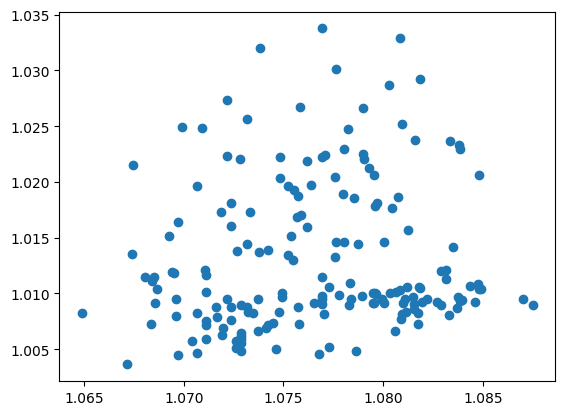

<Figure size 1200x800 with 0 Axes>

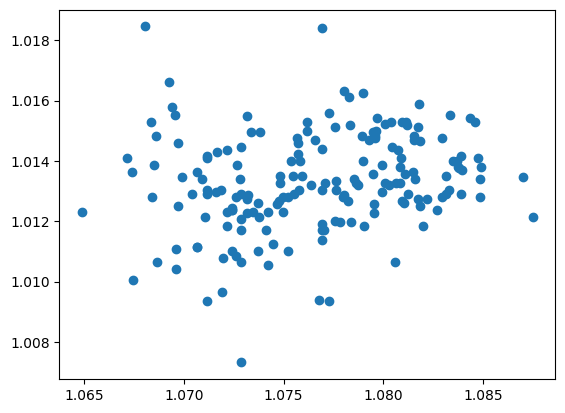

<Figure size 1200x800 with 0 Axes>

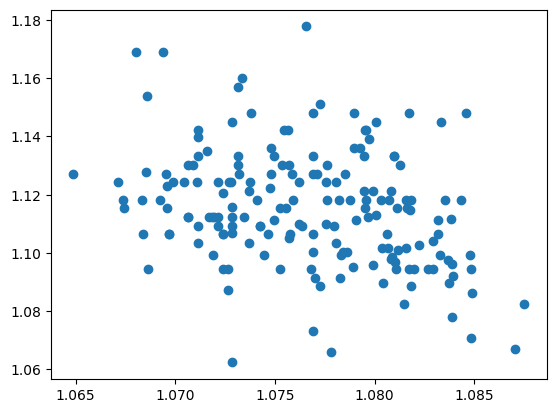

<Figure size 1200x800 with 0 Axes>

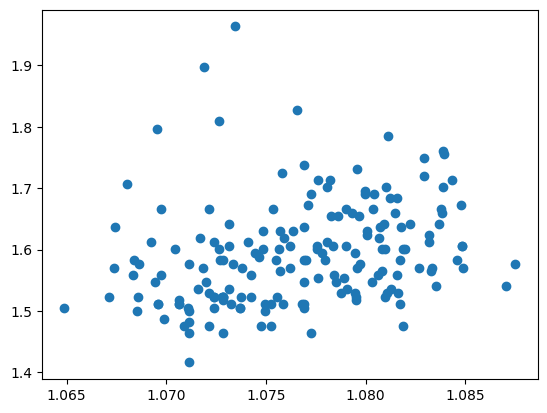

<Figure size 1200x800 with 0 Axes>

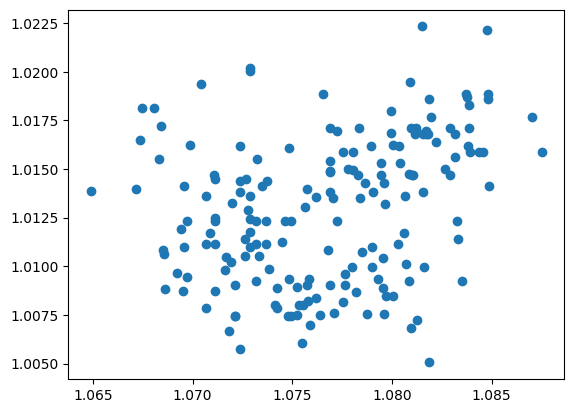

<Figure size 1200x800 with 0 Axes>

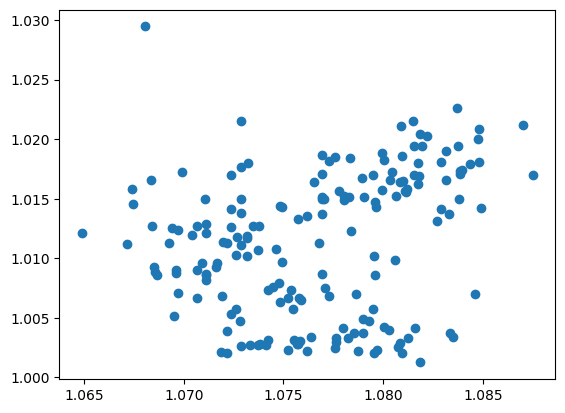

<Figure size 1200x800 with 0 Axes>

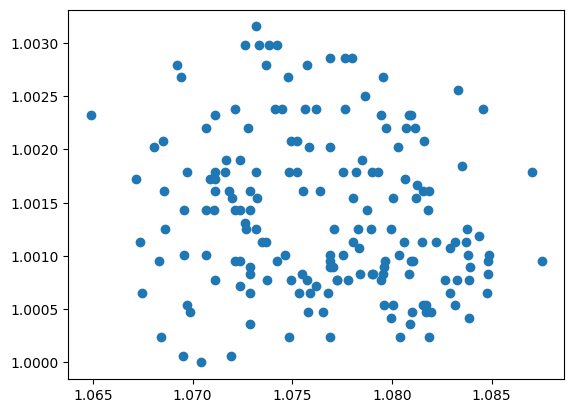

<Figure size 1200x800 with 0 Axes>

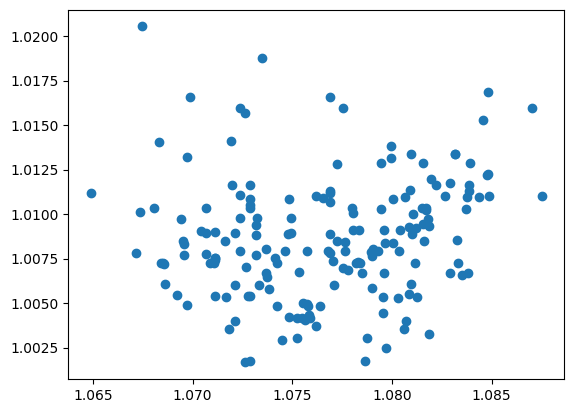

<Figure size 1200x800 with 0 Axes>

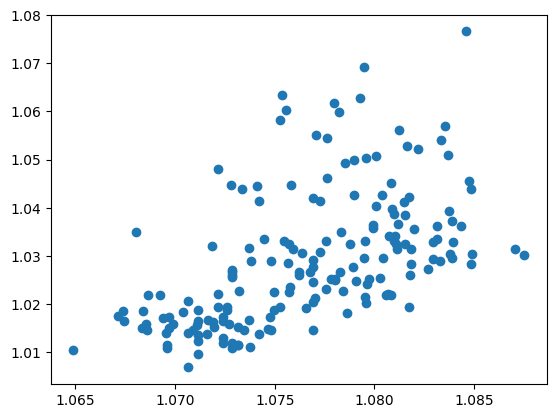

<Figure size 1200x800 with 0 Axes>

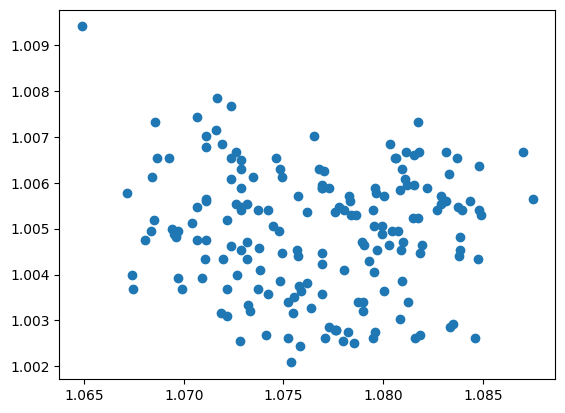

<Figure size 1200x800 with 0 Axes>

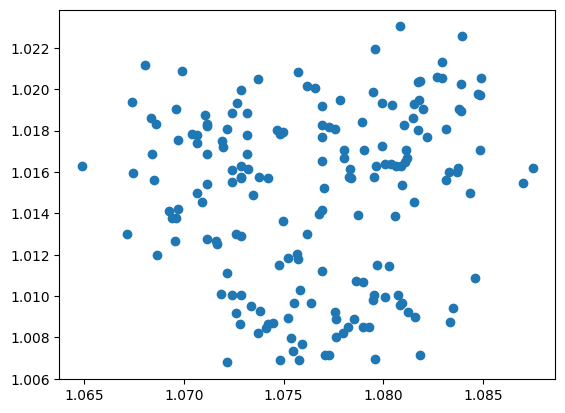

<Figure size 1200x800 with 0 Axes>

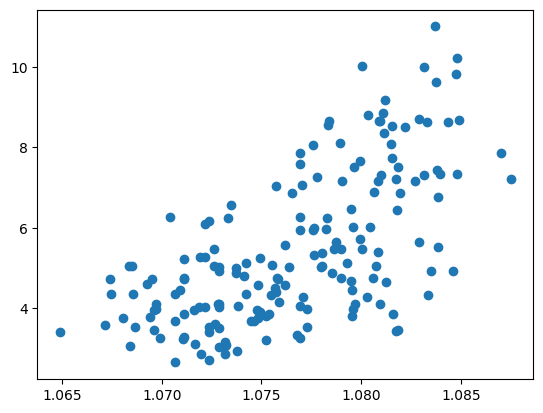

<Figure size 1200x800 with 0 Axes>

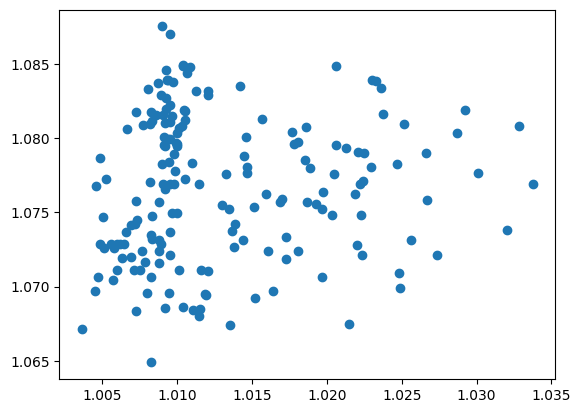

<Figure size 1200x800 with 0 Axes>

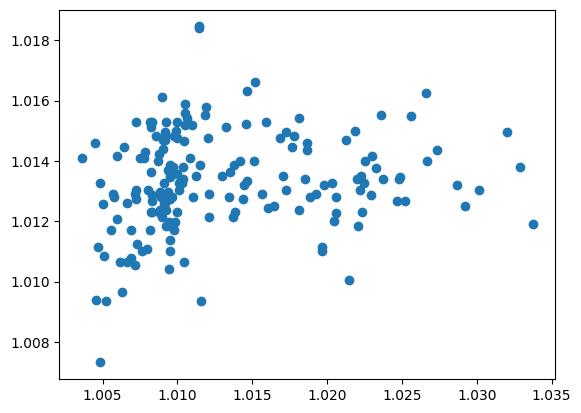

<Figure size 1200x800 with 0 Axes>

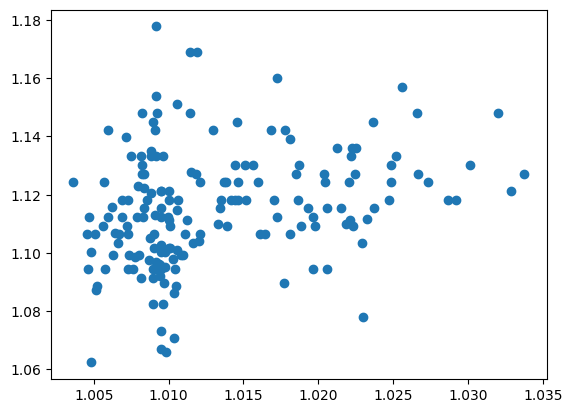

<Figure size 1200x800 with 0 Axes>

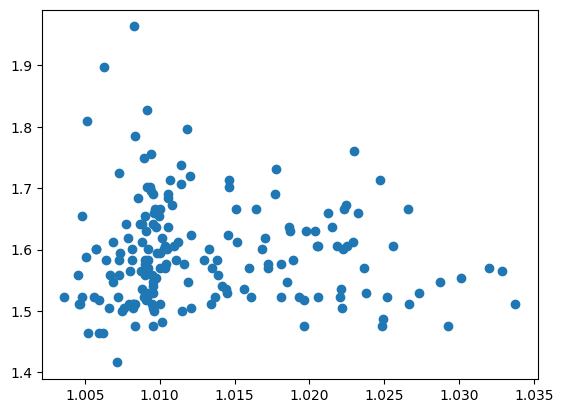

<Figure size 1200x800 with 0 Axes>

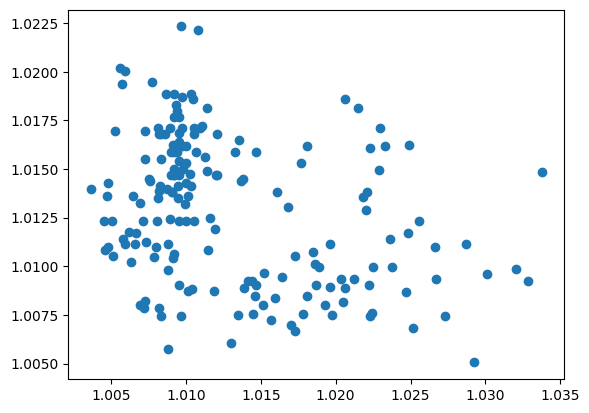

<Figure size 1200x800 with 0 Axes>

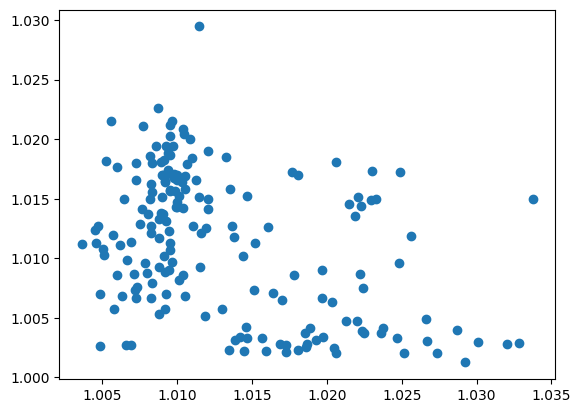

<Figure size 1200x800 with 0 Axes>

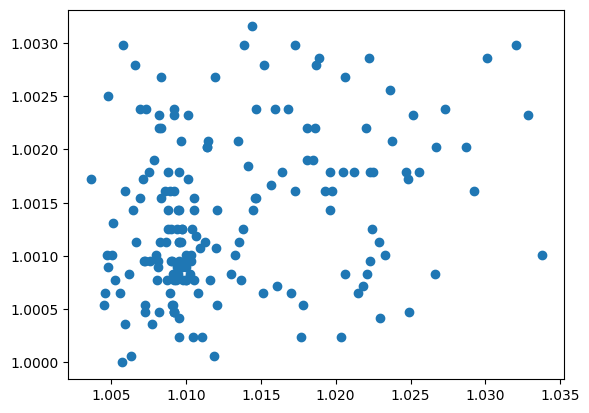

<Figure size 1200x800 with 0 Axes>

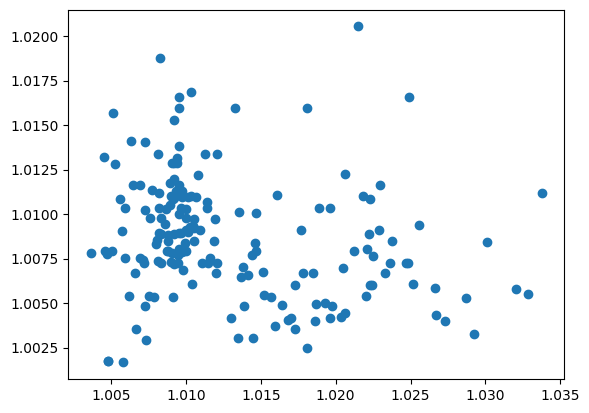

<Figure size 1200x800 with 0 Axes>

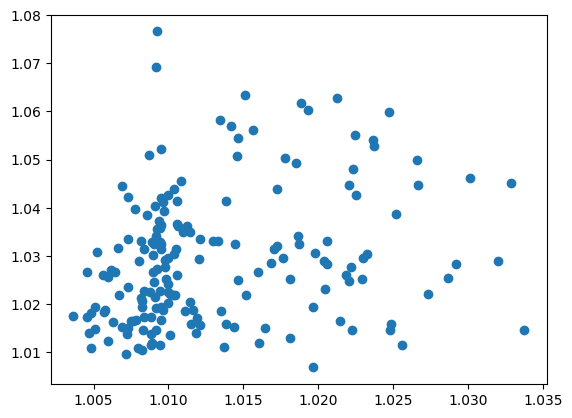

<Figure size 1200x800 with 0 Axes>

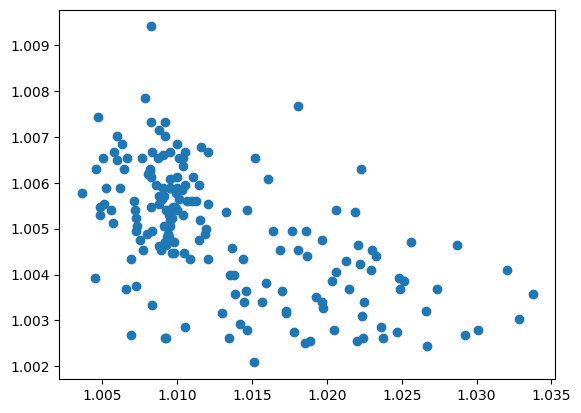

<Figure size 1200x800 with 0 Axes>

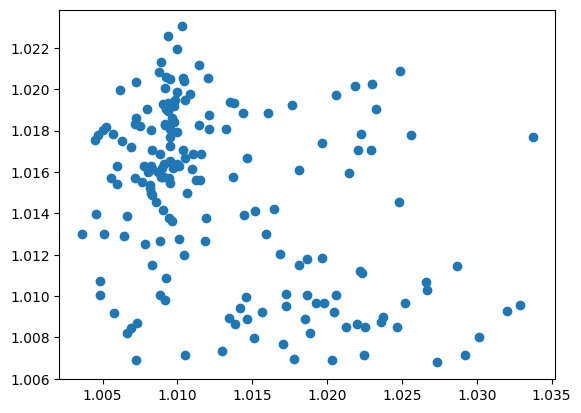

<Figure size 1200x800 with 0 Axes>

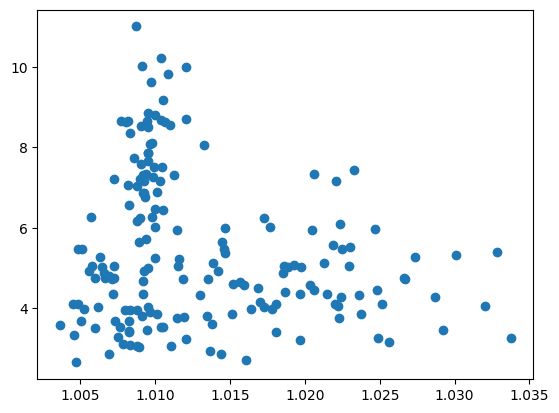

<Figure size 1200x800 with 0 Axes>

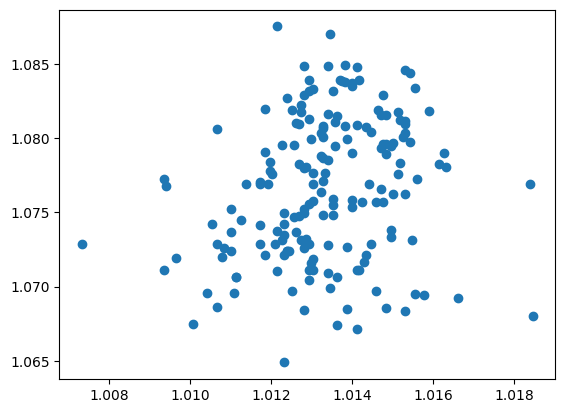

<Figure size 1200x800 with 0 Axes>

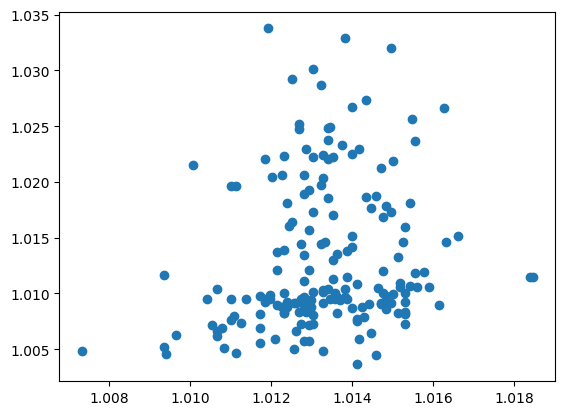

<Figure size 1200x800 with 0 Axes>

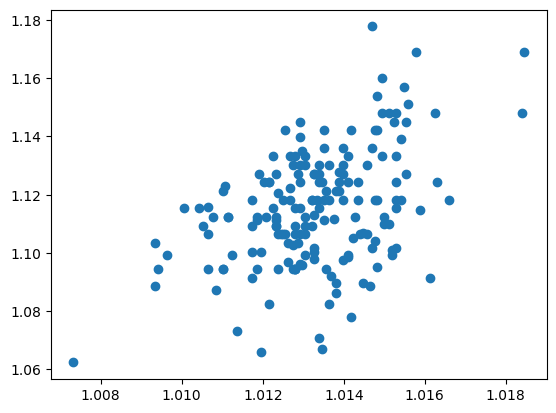

<Figure size 1200x800 with 0 Axes>

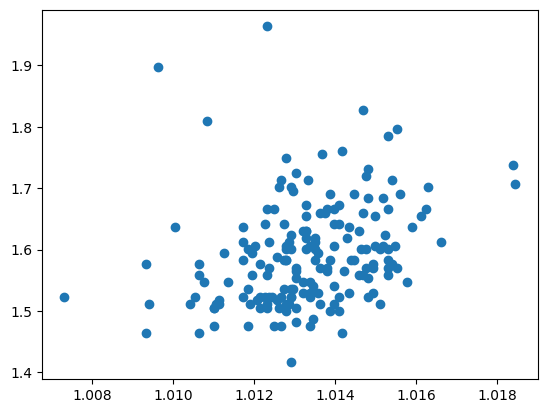

<Figure size 1200x800 with 0 Axes>

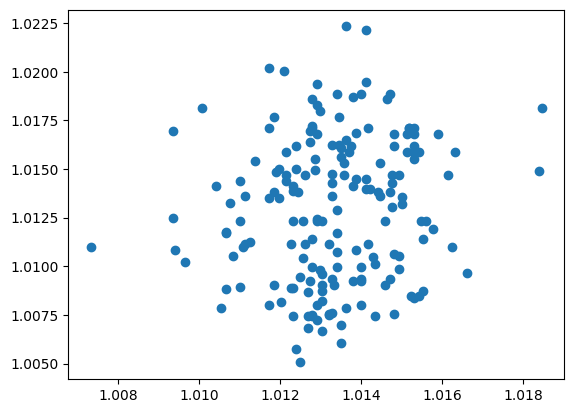

<Figure size 1200x800 with 0 Axes>

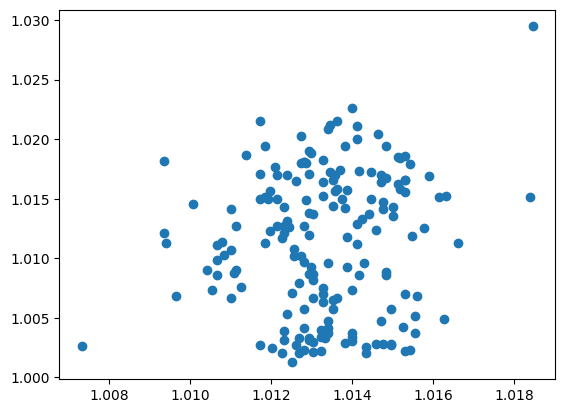

<Figure size 1200x800 with 0 Axes>

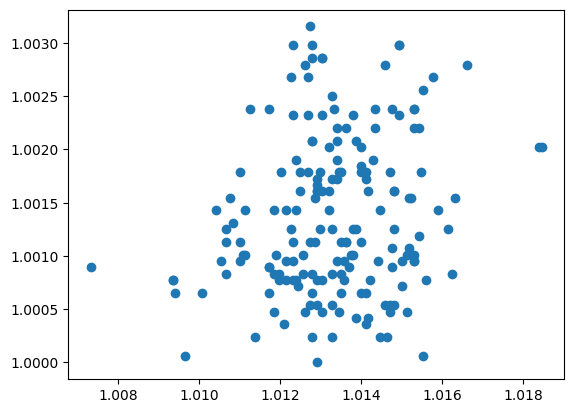

<Figure size 1200x800 with 0 Axes>

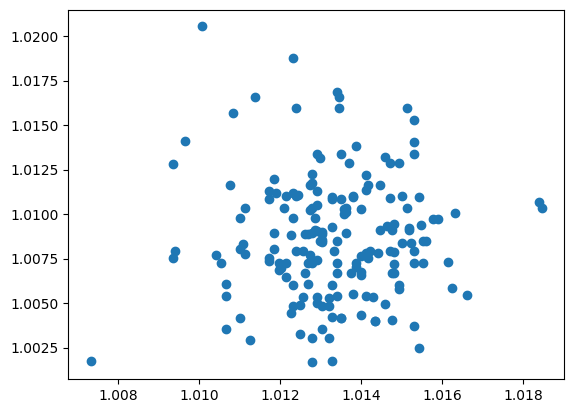

<Figure size 1200x800 with 0 Axes>

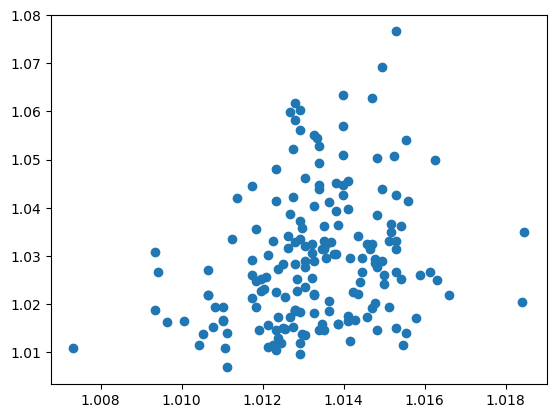

<Figure size 1200x800 with 0 Axes>

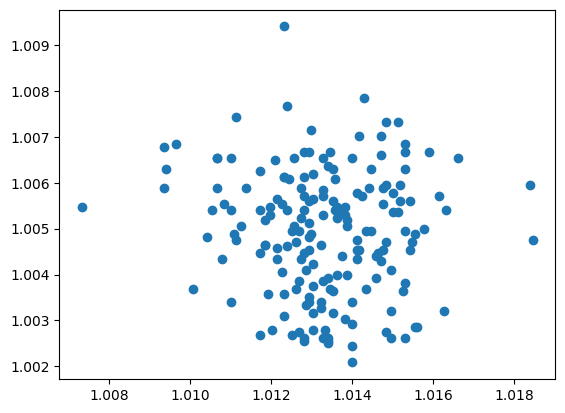

<Figure size 1200x800 with 0 Axes>

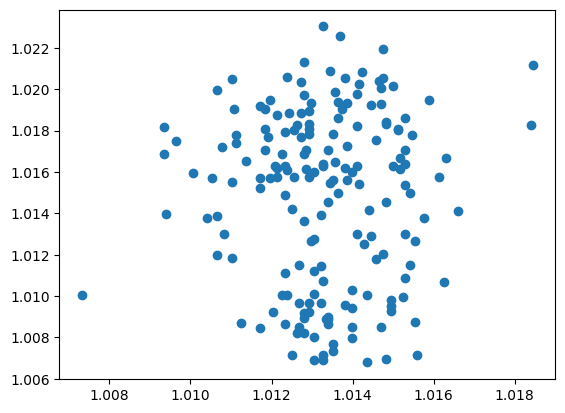

<Figure size 1200x800 with 0 Axes>

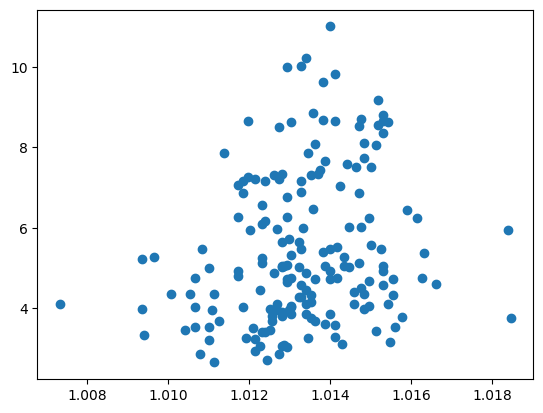

<Figure size 1200x800 with 0 Axes>

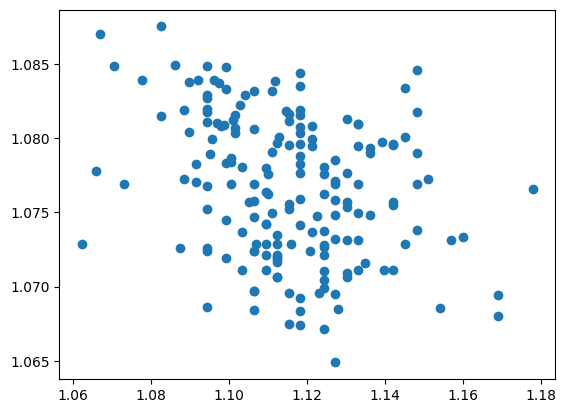

<Figure size 1200x800 with 0 Axes>

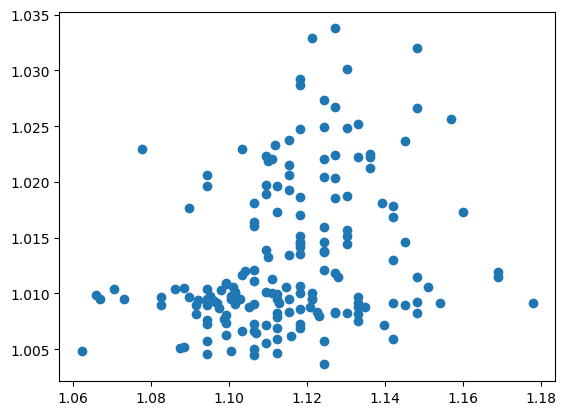

<Figure size 1200x800 with 0 Axes>

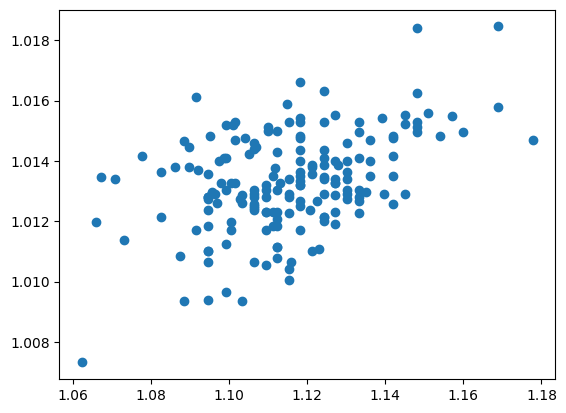

<Figure size 1200x800 with 0 Axes>

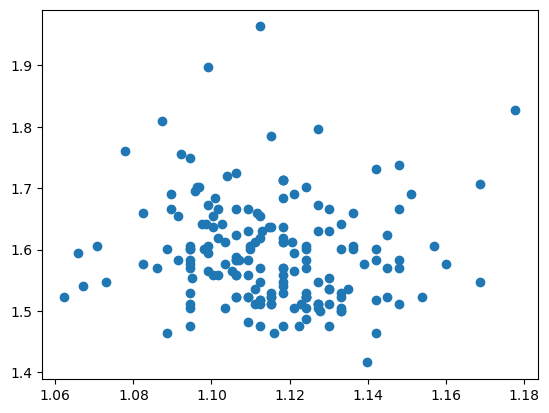

<Figure size 1200x800 with 0 Axes>

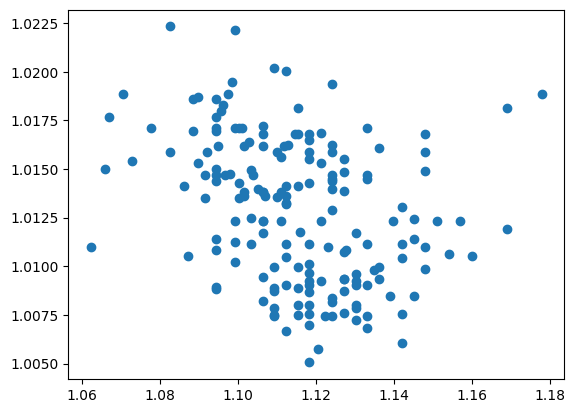

<Figure size 1200x800 with 0 Axes>

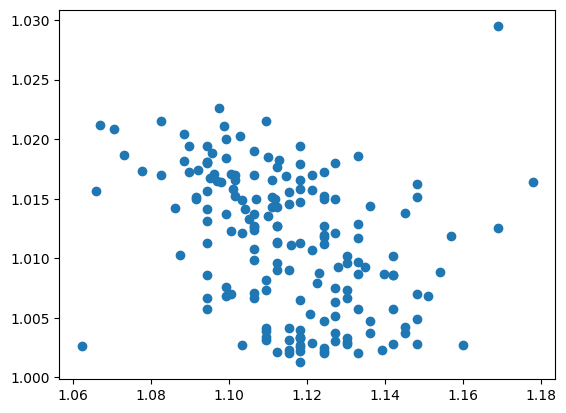

<Figure size 1200x800 with 0 Axes>

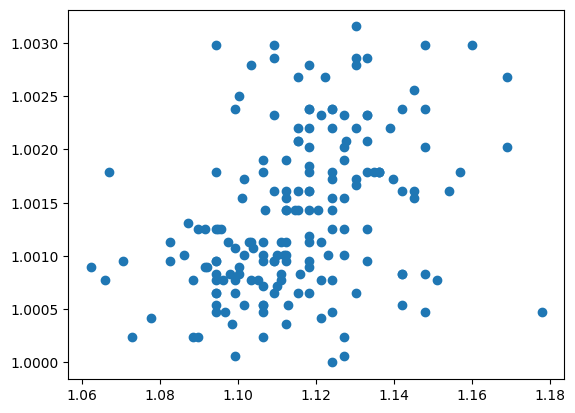

<Figure size 1200x800 with 0 Axes>

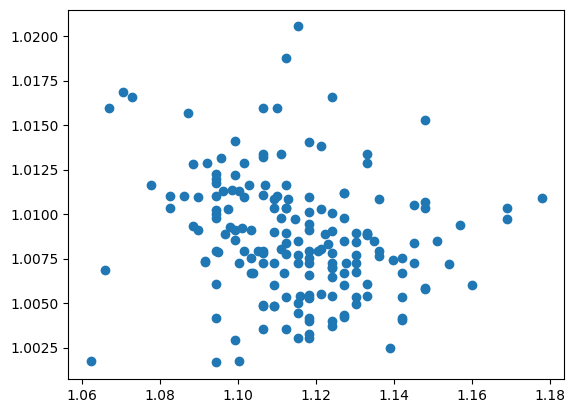

<Figure size 1200x800 with 0 Axes>

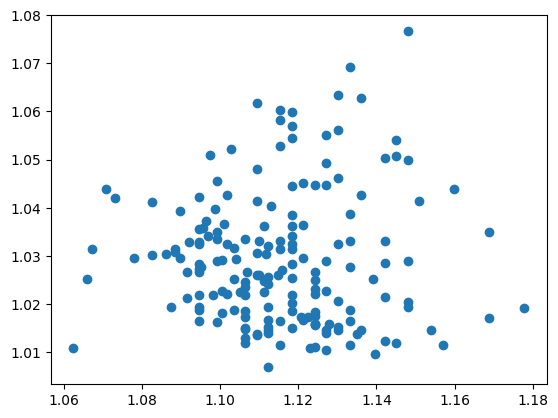

<Figure size 1200x800 with 0 Axes>

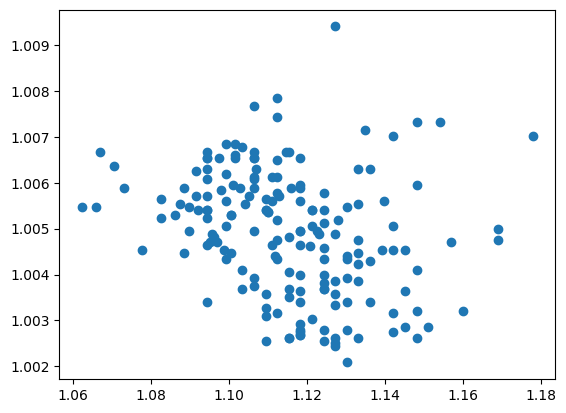

<Figure size 1200x800 with 0 Axes>

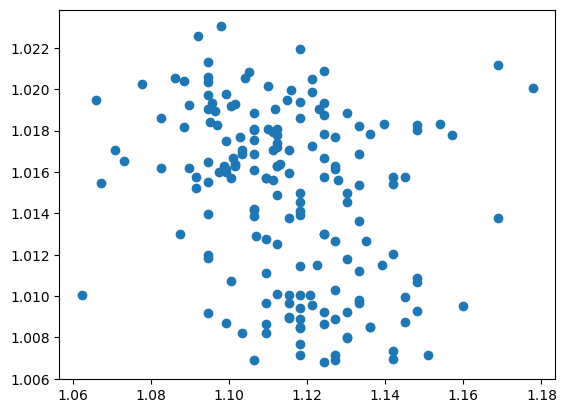

<Figure size 1200x800 with 0 Axes>

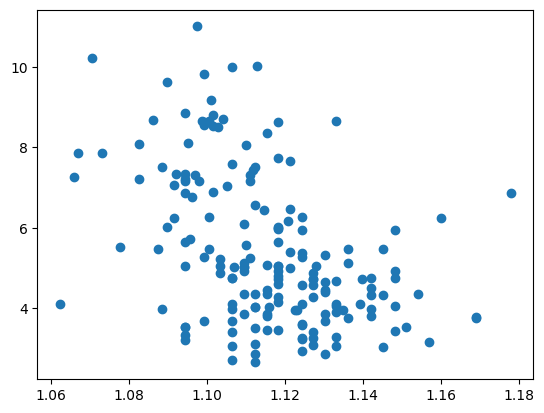

<Figure size 1200x800 with 0 Axes>

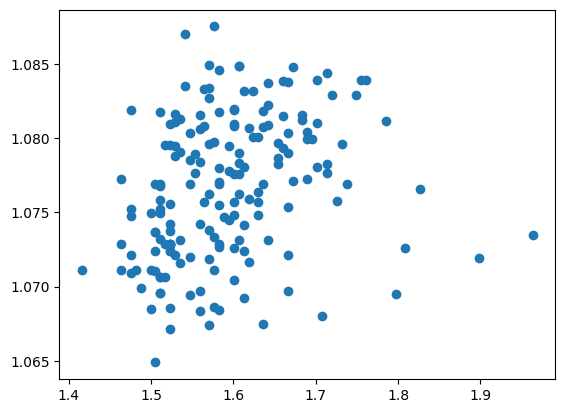

<Figure size 1200x800 with 0 Axes>

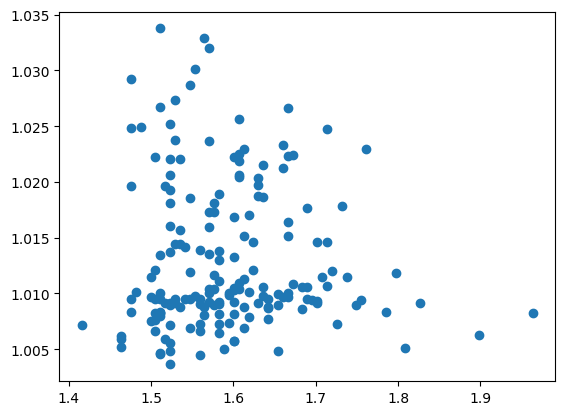

<Figure size 1200x800 with 0 Axes>

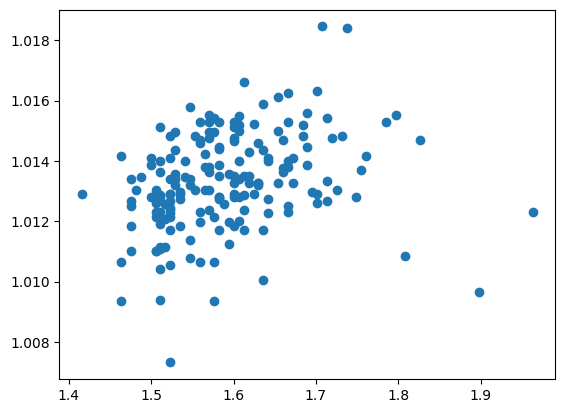

<Figure size 1200x800 with 0 Axes>

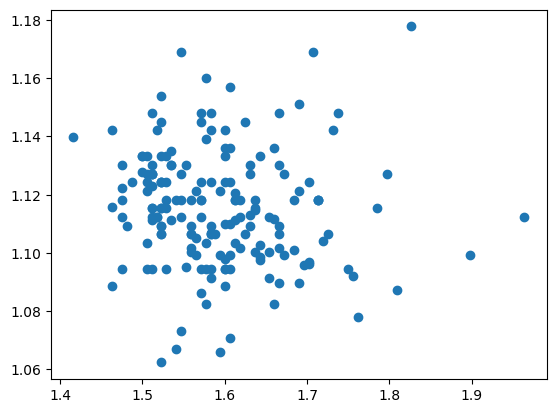

<Figure size 1200x800 with 0 Axes>

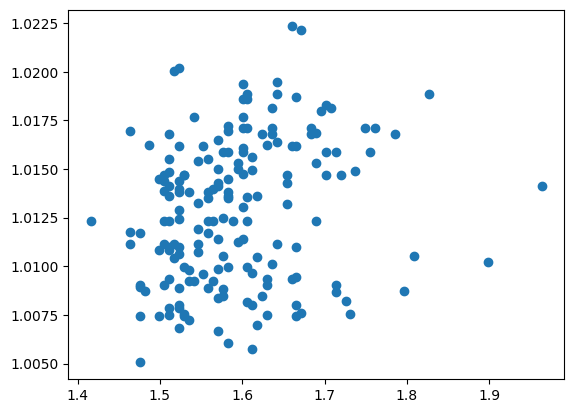

<Figure size 1200x800 with 0 Axes>

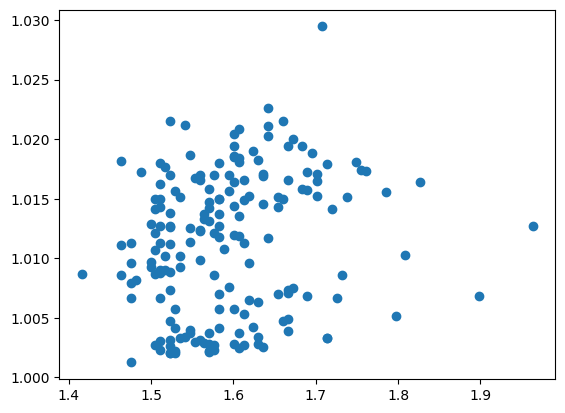

<Figure size 1200x800 with 0 Axes>

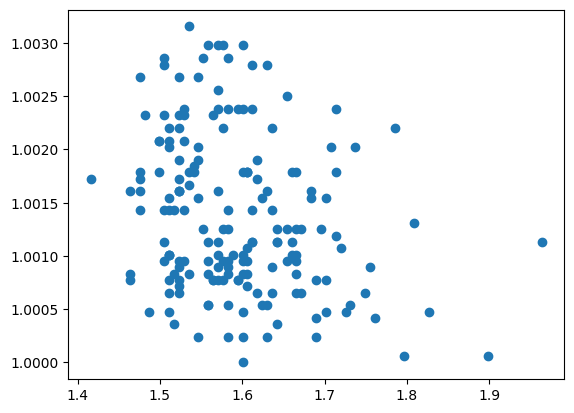

<Figure size 1200x800 with 0 Axes>

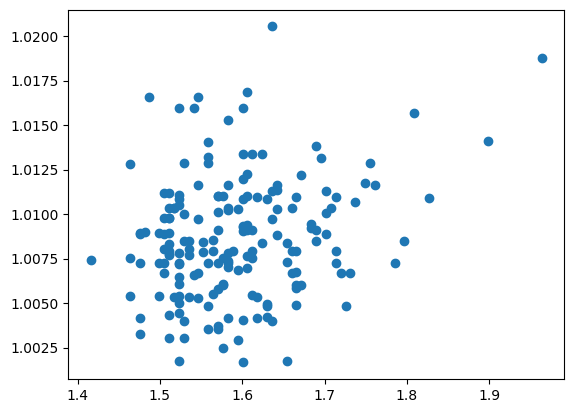

<Figure size 1200x800 with 0 Axes>

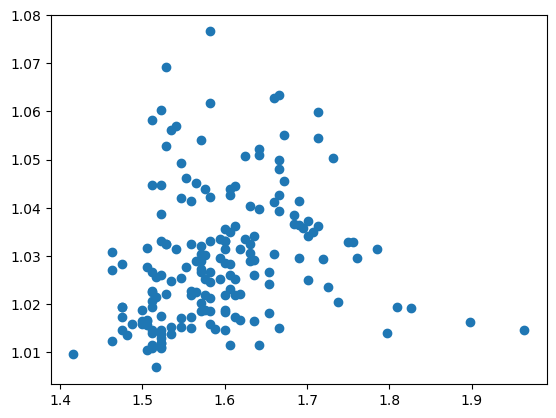

<Figure size 1200x800 with 0 Axes>

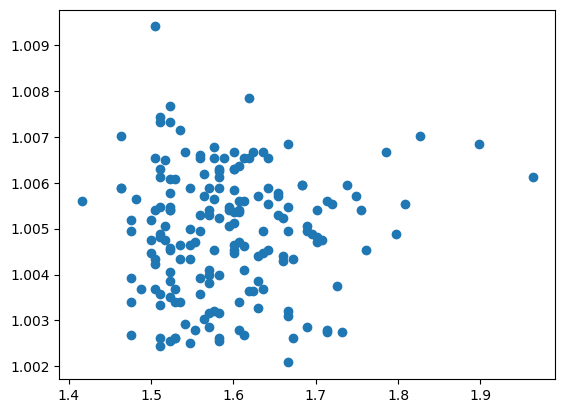

<Figure size 1200x800 with 0 Axes>

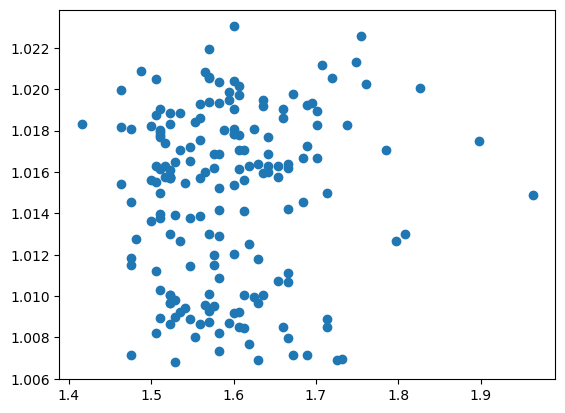

<Figure size 1200x800 with 0 Axes>

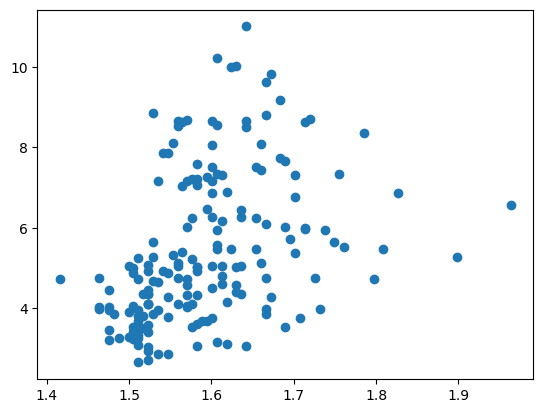

<Figure size 1200x800 with 0 Axes>

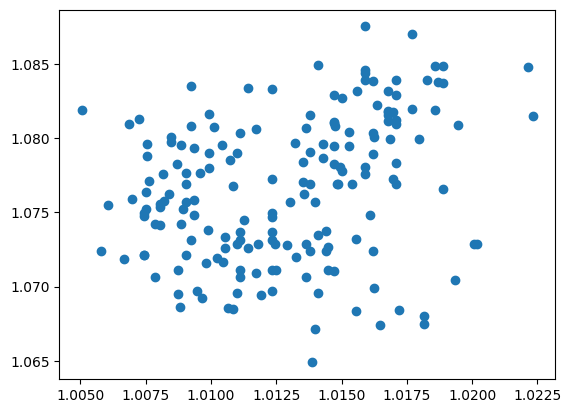

<Figure size 1200x800 with 0 Axes>

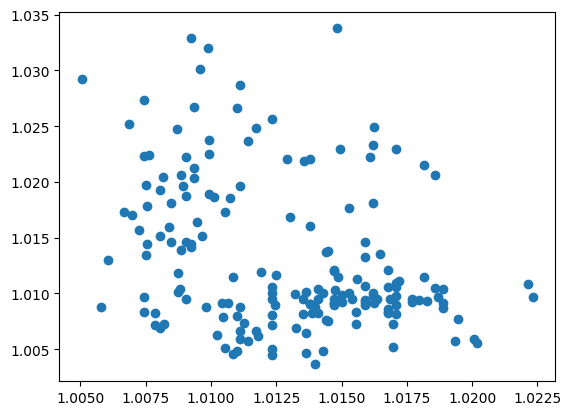

<Figure size 1200x800 with 0 Axes>

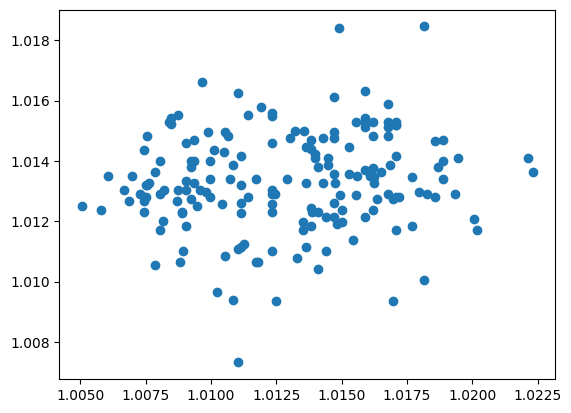

<Figure size 1200x800 with 0 Axes>

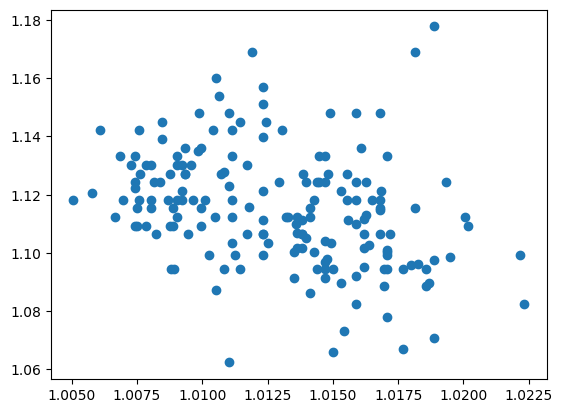

<Figure size 1200x800 with 0 Axes>

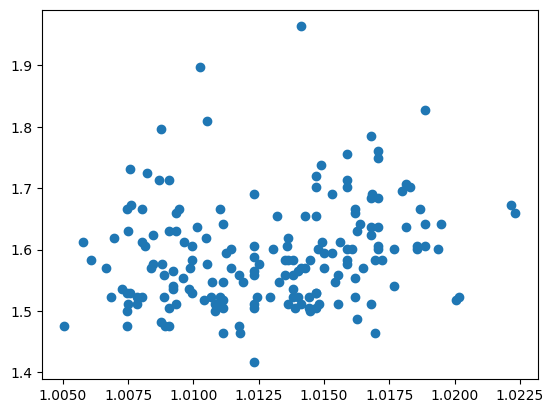

<Figure size 1200x800 with 0 Axes>

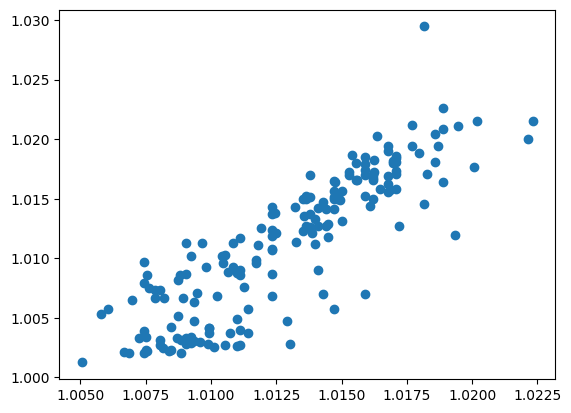

<Figure size 1200x800 with 0 Axes>

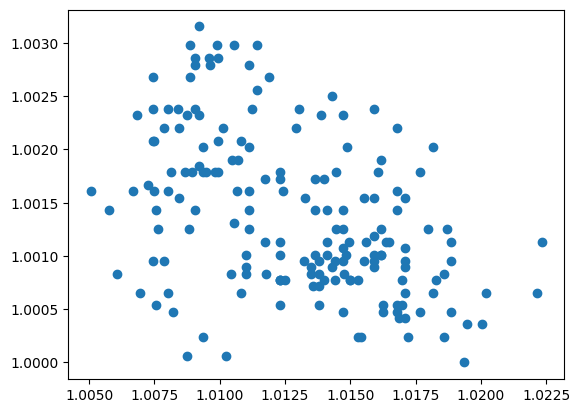

<Figure size 1200x800 with 0 Axes>

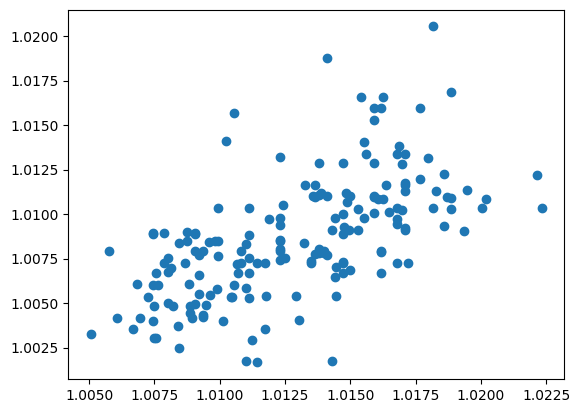

<Figure size 1200x800 with 0 Axes>

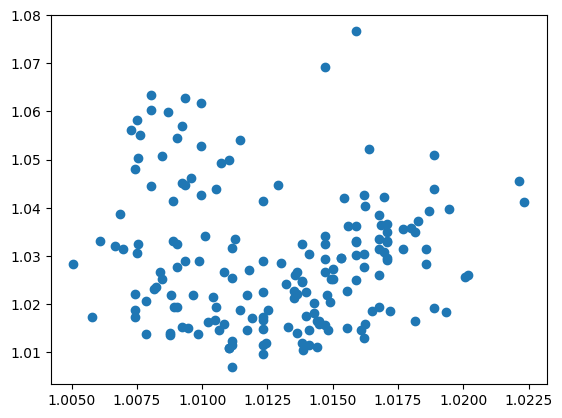

<Figure size 1200x800 with 0 Axes>

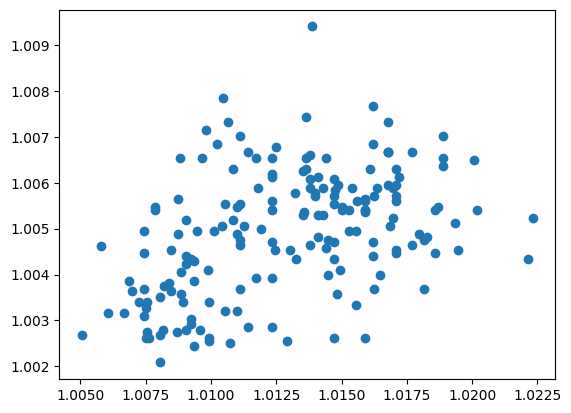

<Figure size 1200x800 with 0 Axes>

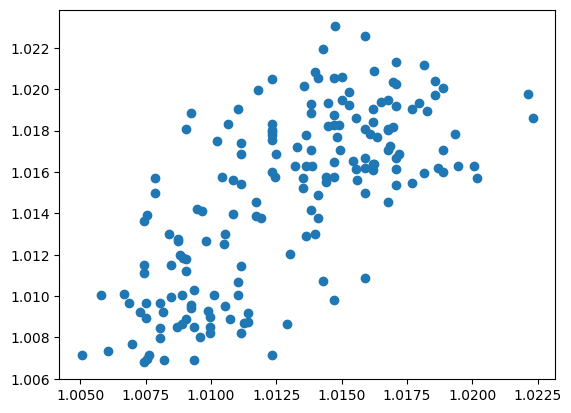

<Figure size 1200x800 with 0 Axes>

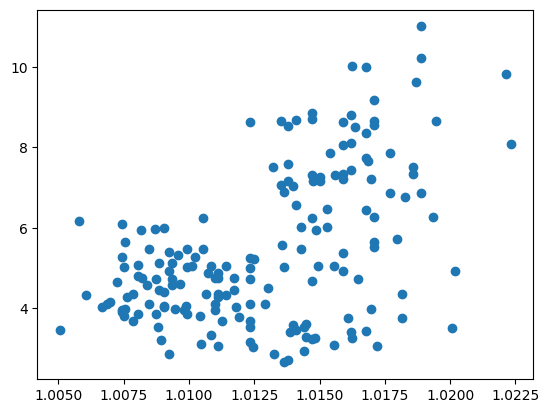

<Figure size 1200x800 with 0 Axes>

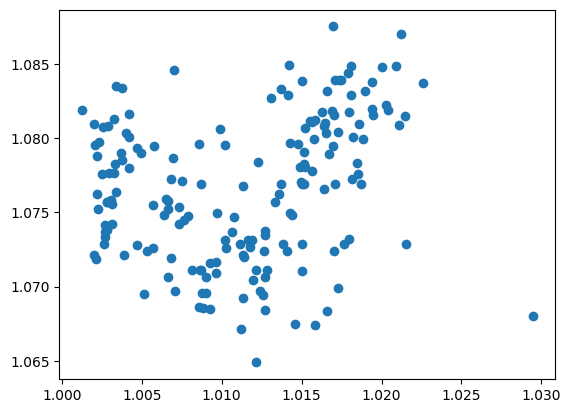

<Figure size 1200x800 with 0 Axes>

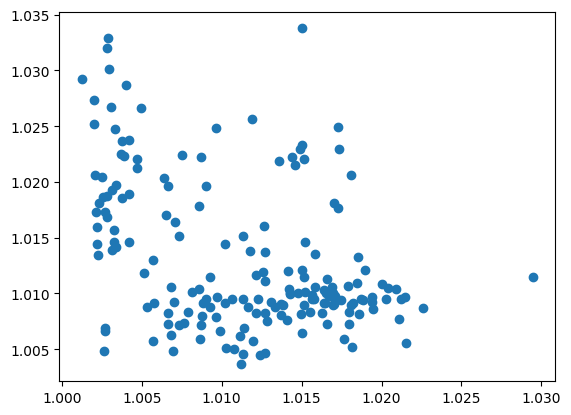

<Figure size 1200x800 with 0 Axes>

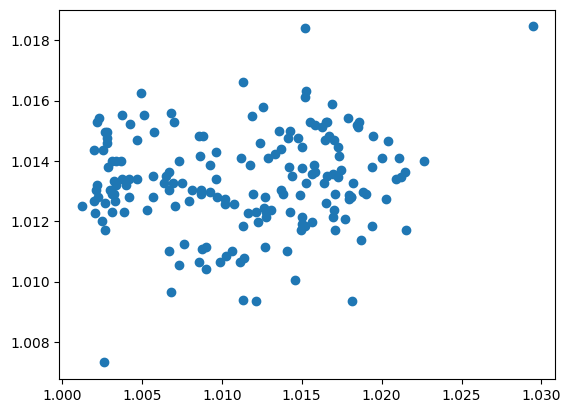

<Figure size 1200x800 with 0 Axes>

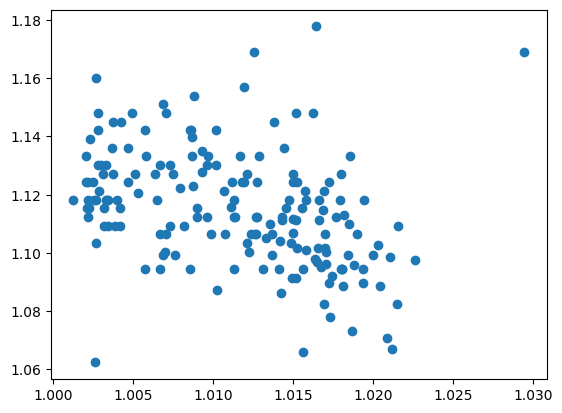

<Figure size 1200x800 with 0 Axes>

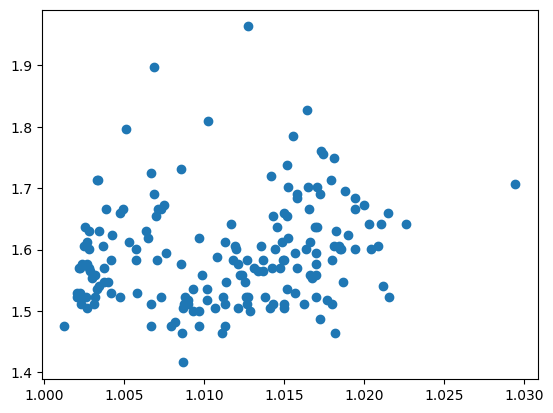

<Figure size 1200x800 with 0 Axes>

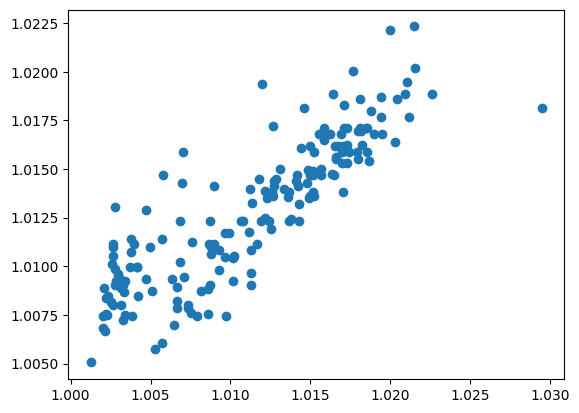

<Figure size 1200x800 with 0 Axes>

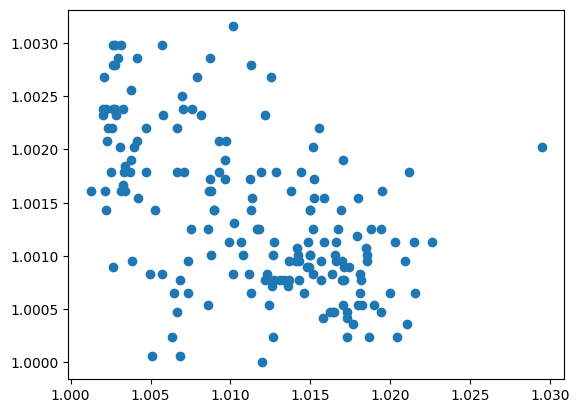

<Figure size 1200x800 with 0 Axes>

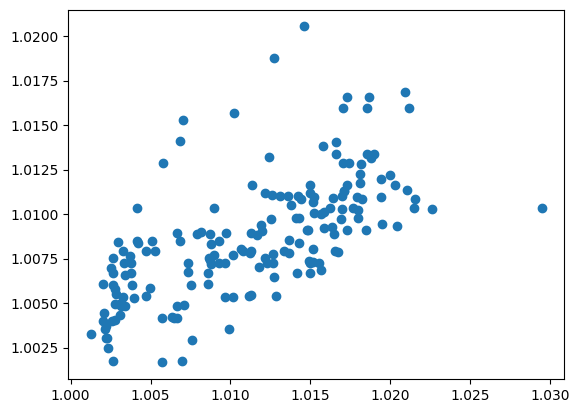

<Figure size 1200x800 with 0 Axes>

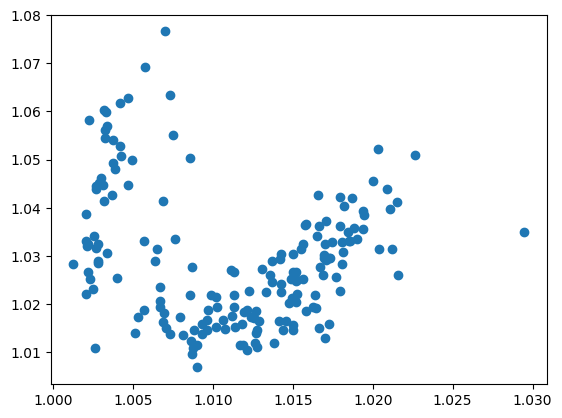

<Figure size 1200x800 with 0 Axes>

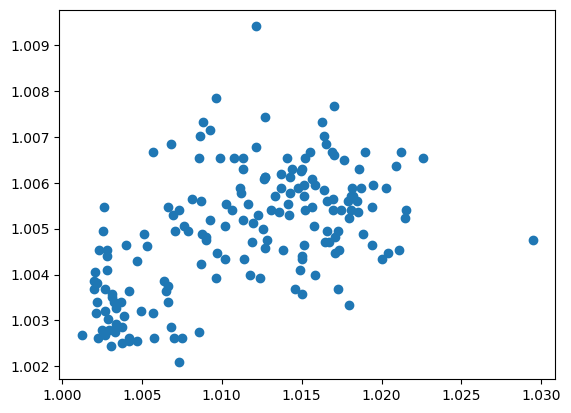

<Figure size 1200x800 with 0 Axes>

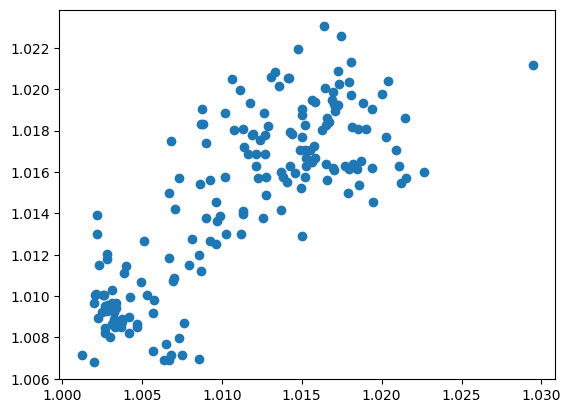

<Figure size 1200x800 with 0 Axes>

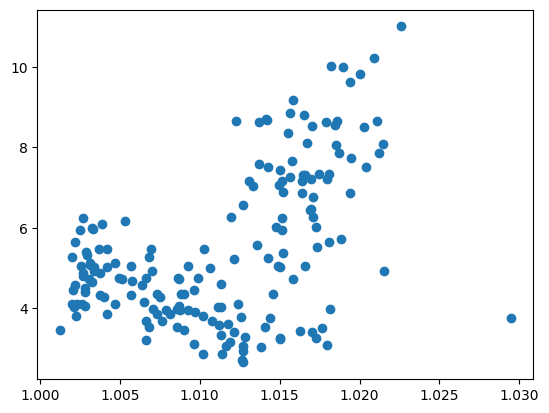

<Figure size 1200x800 with 0 Axes>

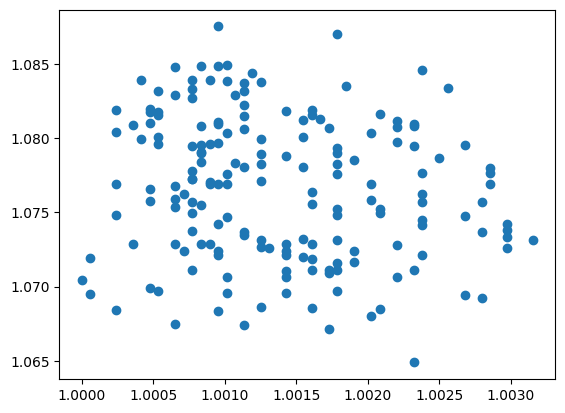

<Figure size 1200x800 with 0 Axes>

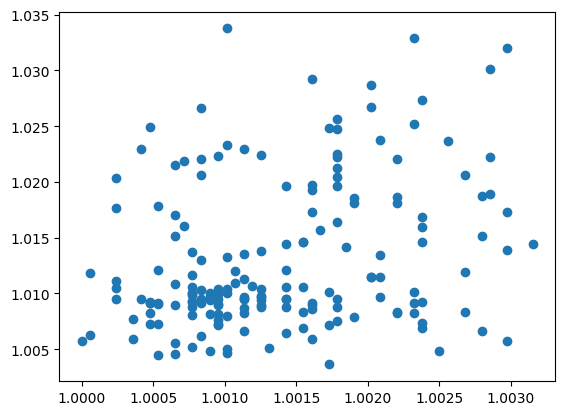

<Figure size 1200x800 with 0 Axes>

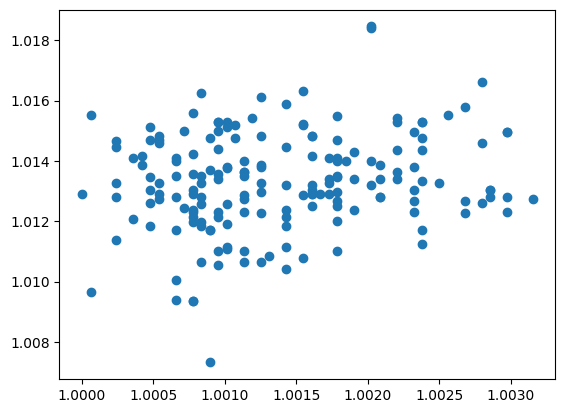

<Figure size 1200x800 with 0 Axes>

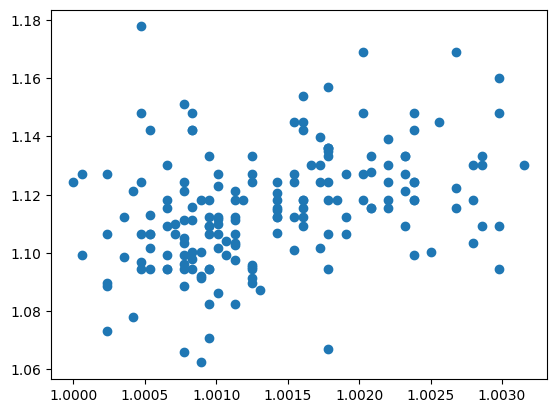

<Figure size 1200x800 with 0 Axes>

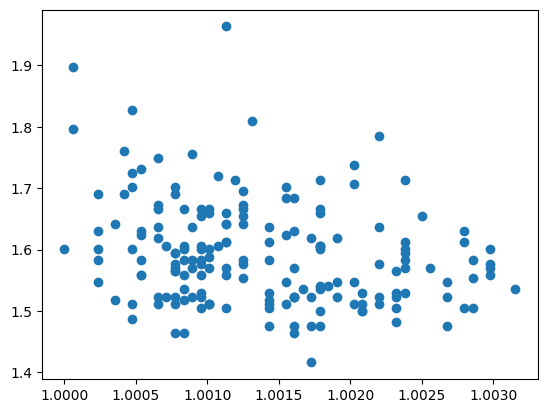

<Figure size 1200x800 with 0 Axes>

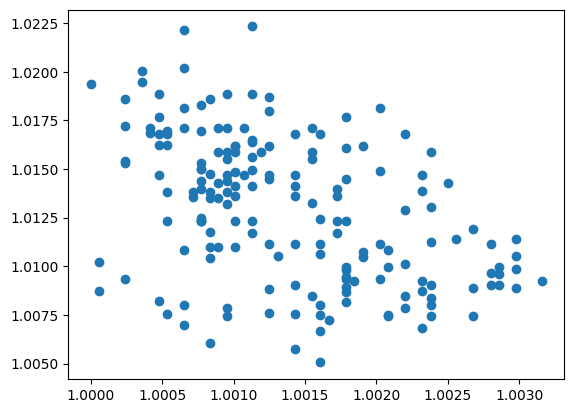

<Figure size 1200x800 with 0 Axes>

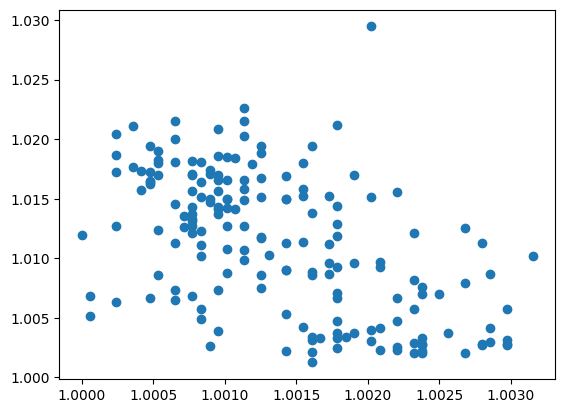

<Figure size 1200x800 with 0 Axes>

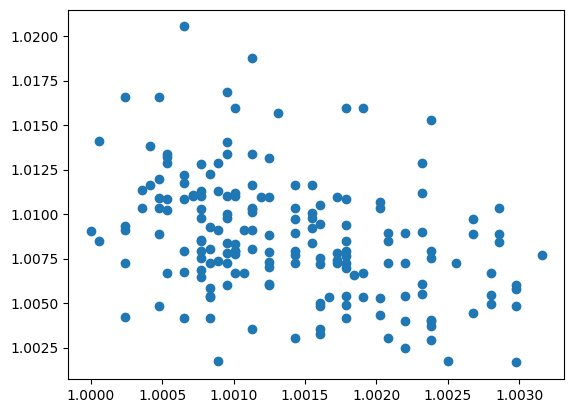

<Figure size 1200x800 with 0 Axes>

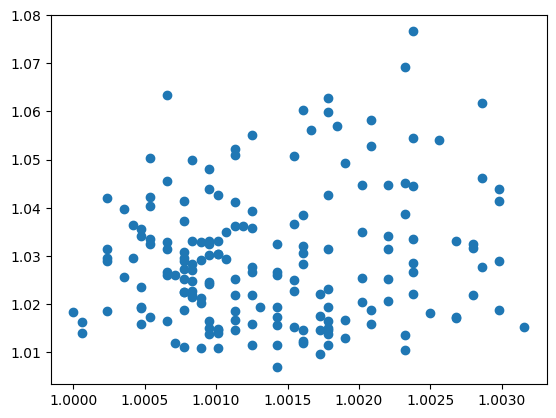

<Figure size 1200x800 with 0 Axes>

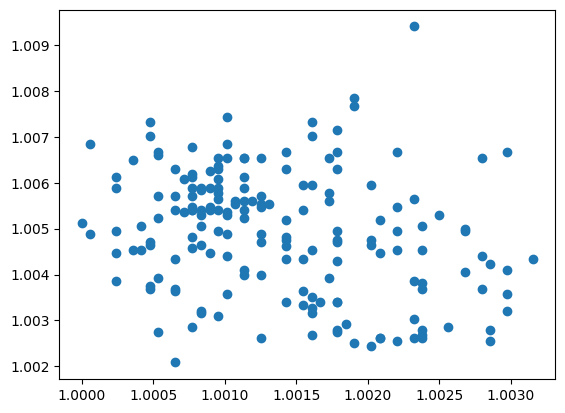

<Figure size 1200x800 with 0 Axes>

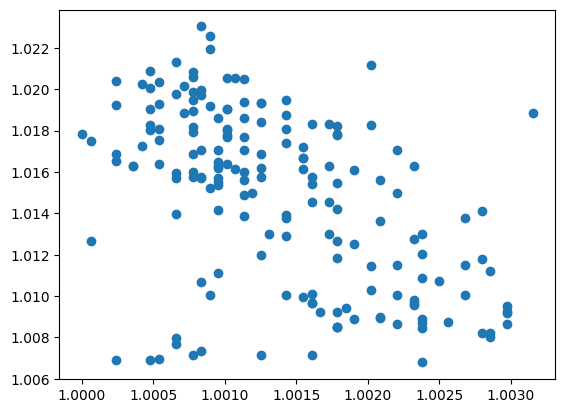

<Figure size 1200x800 with 0 Axes>

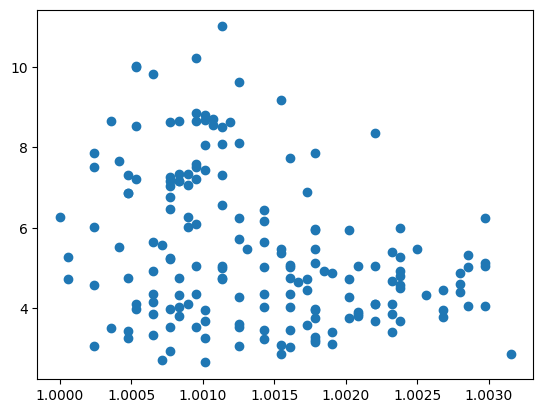

<Figure size 1200x800 with 0 Axes>

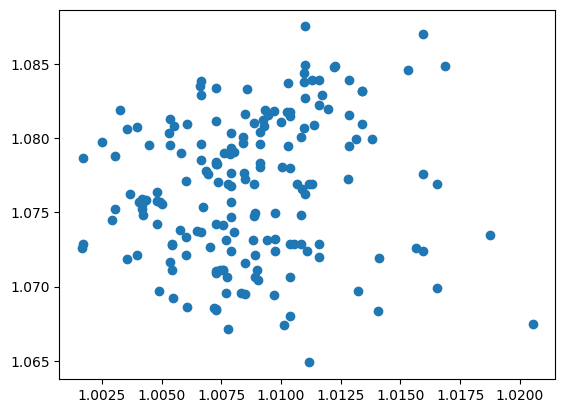

<Figure size 1200x800 with 0 Axes>

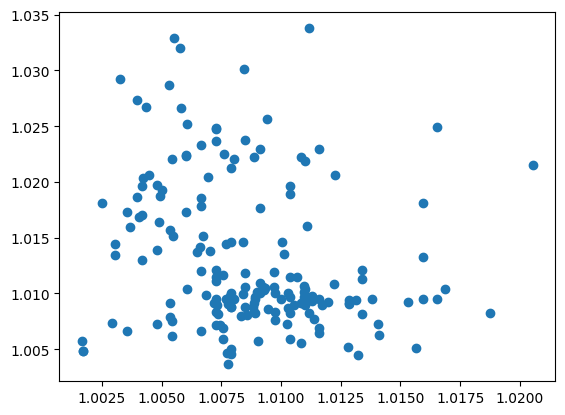

<Figure size 1200x800 with 0 Axes>

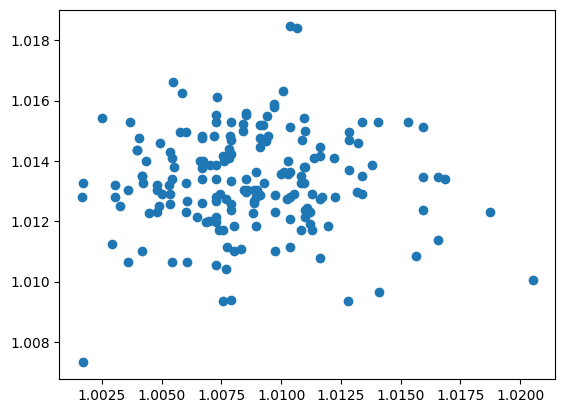

<Figure size 1200x800 with 0 Axes>

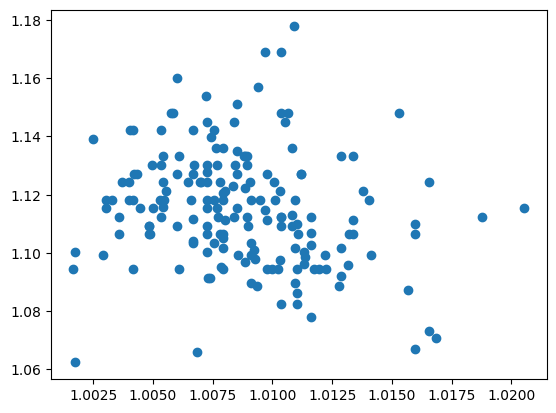

<Figure size 1200x800 with 0 Axes>

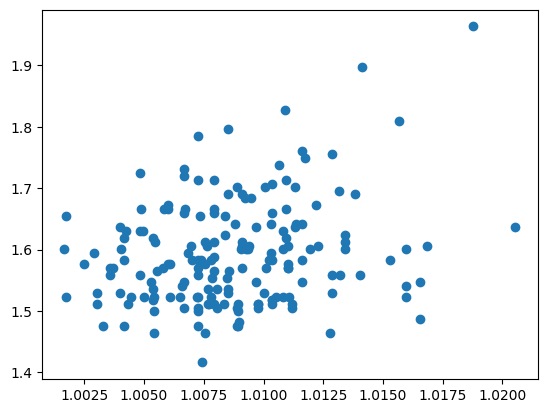

<Figure size 1200x800 with 0 Axes>

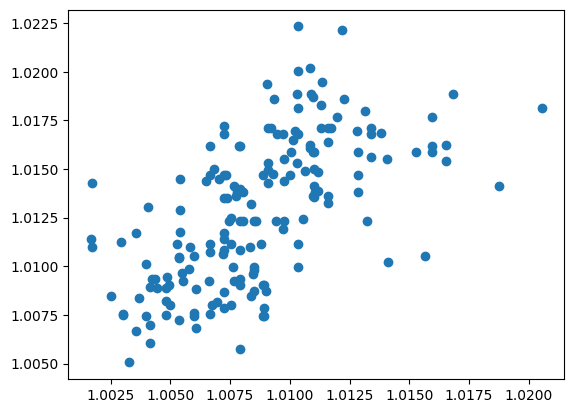

<Figure size 1200x800 with 0 Axes>

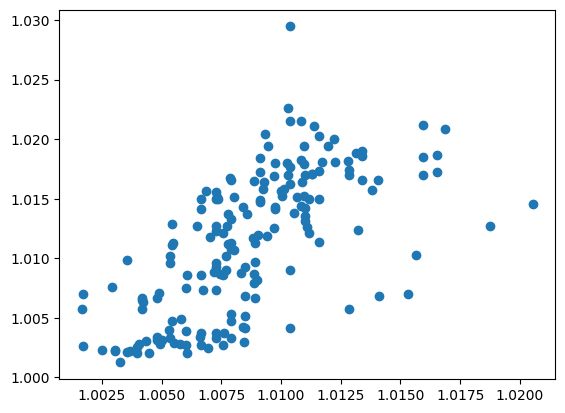

<Figure size 1200x800 with 0 Axes>

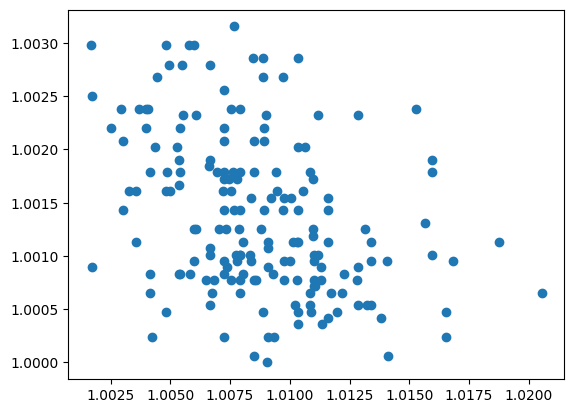

<Figure size 1200x800 with 0 Axes>

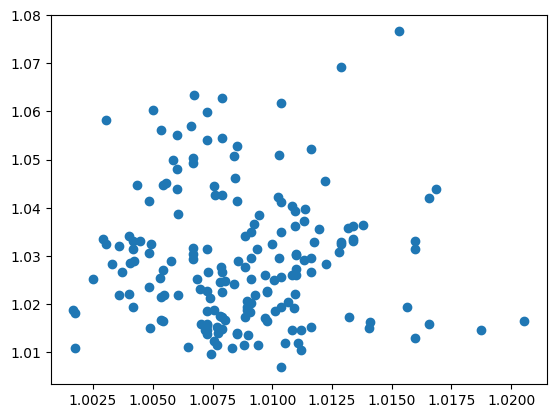

<Figure size 1200x800 with 0 Axes>

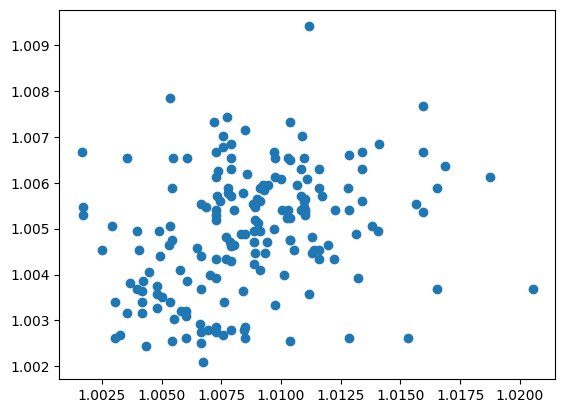

<Figure size 1200x800 with 0 Axes>

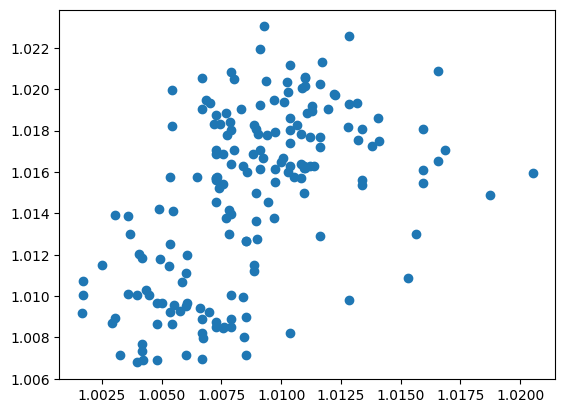

<Figure size 1200x800 with 0 Axes>

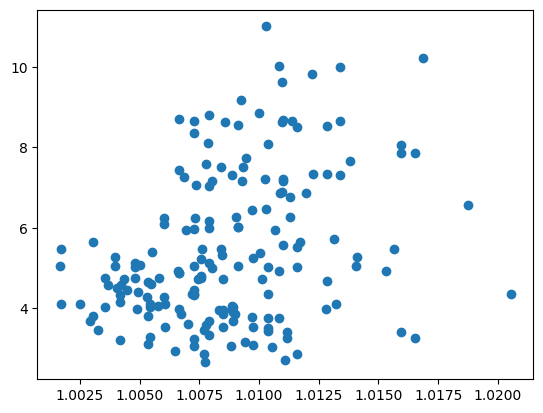

<Figure size 1200x800 with 0 Axes>

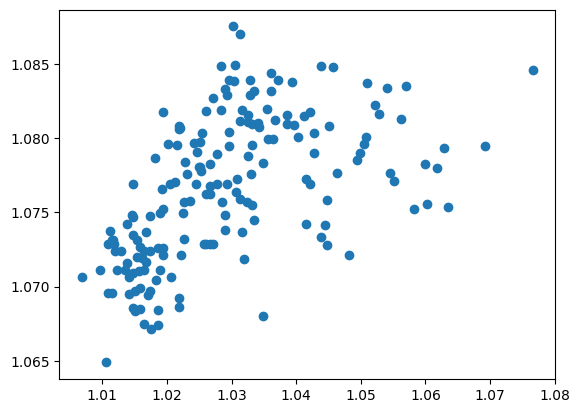

<Figure size 1200x800 with 0 Axes>

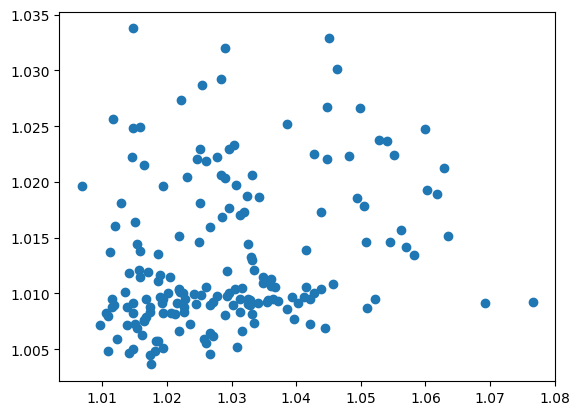

<Figure size 1200x800 with 0 Axes>

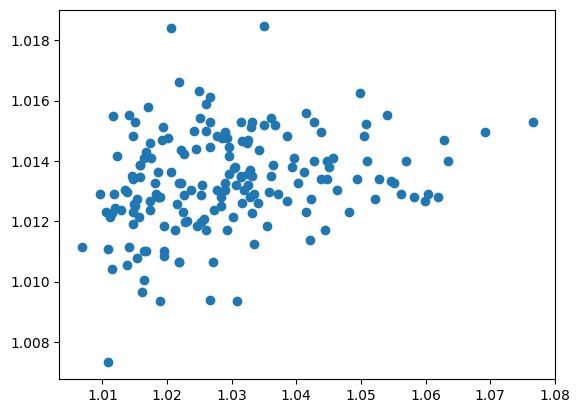

<Figure size 1200x800 with 0 Axes>

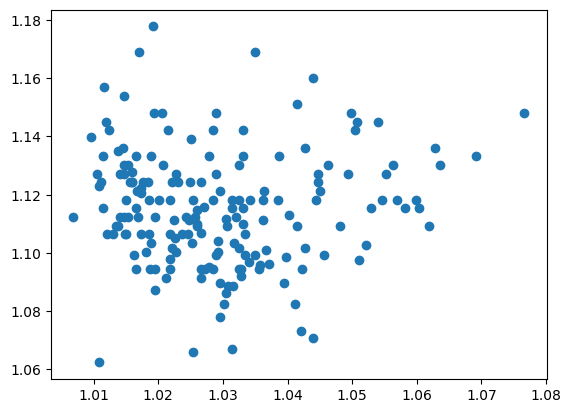

<Figure size 1200x800 with 0 Axes>

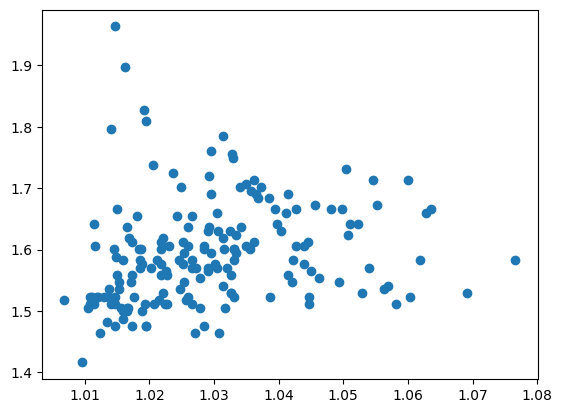

<Figure size 1200x800 with 0 Axes>

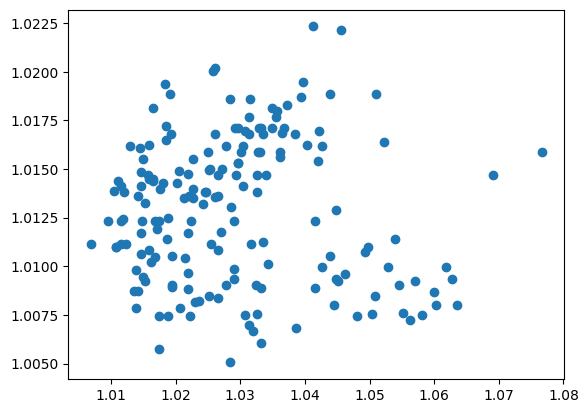

<Figure size 1200x800 with 0 Axes>

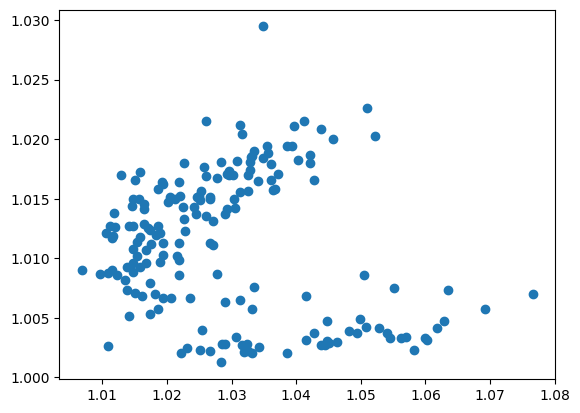

<Figure size 1200x800 with 0 Axes>

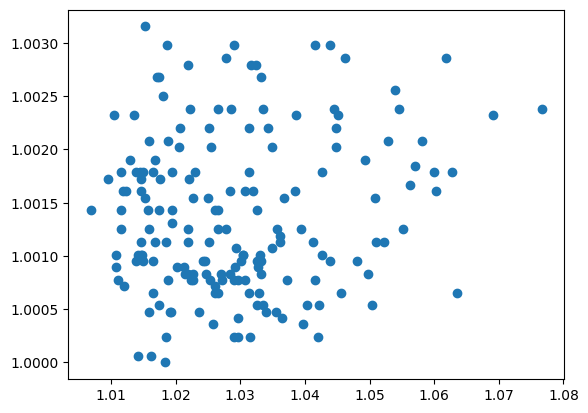

<Figure size 1200x800 with 0 Axes>

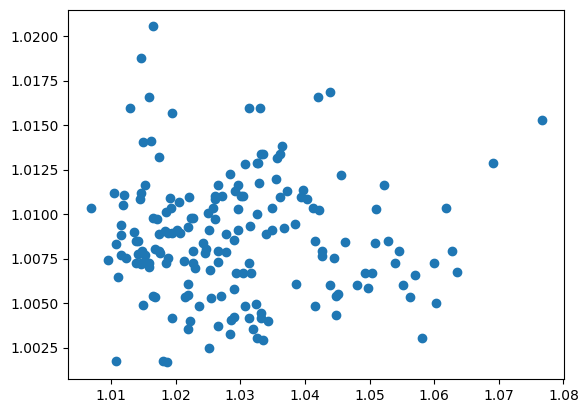

<Figure size 1200x800 with 0 Axes>

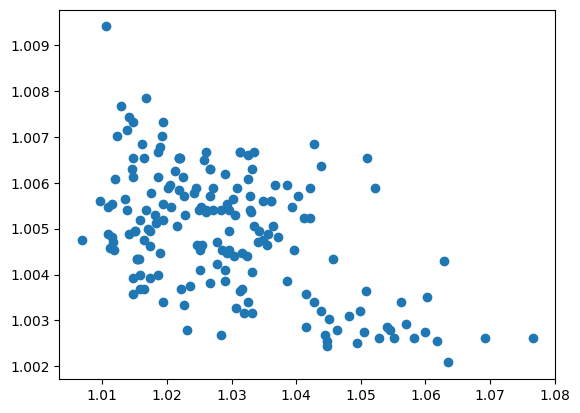

<Figure size 1200x800 with 0 Axes>

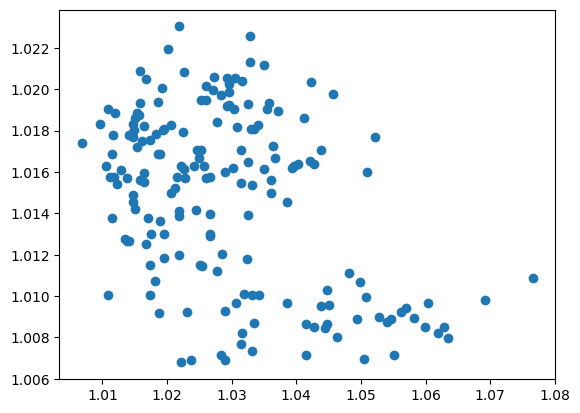

<Figure size 1200x800 with 0 Axes>

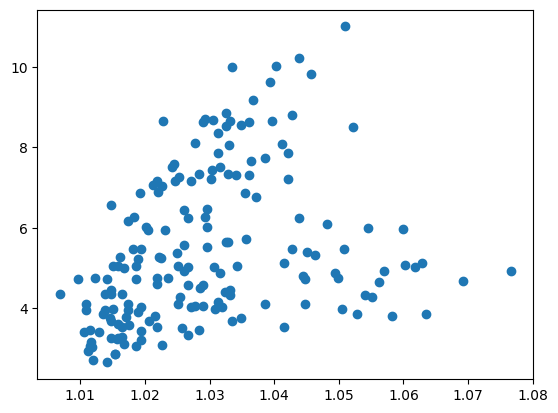

<Figure size 1200x800 with 0 Axes>

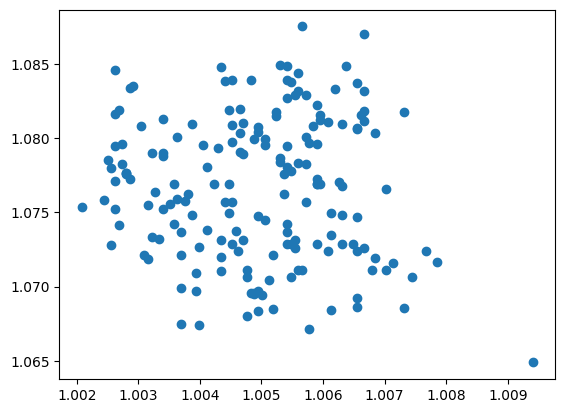

<Figure size 1200x800 with 0 Axes>

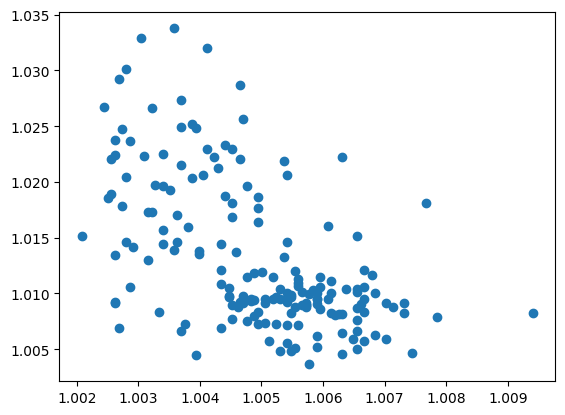

<Figure size 1200x800 with 0 Axes>

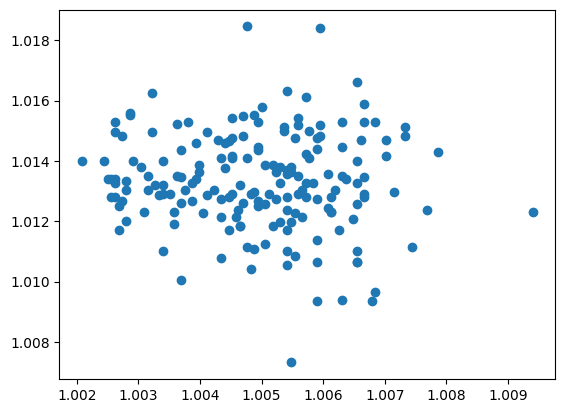

<Figure size 1200x800 with 0 Axes>

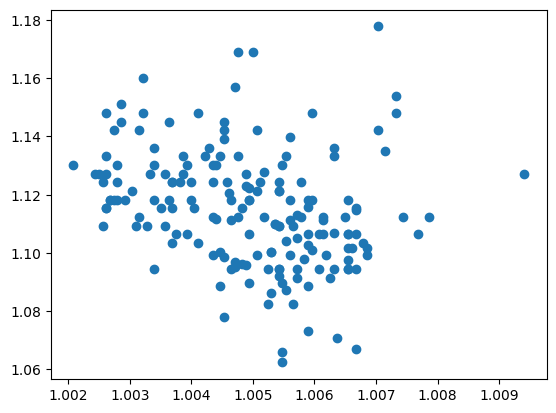

<Figure size 1200x800 with 0 Axes>

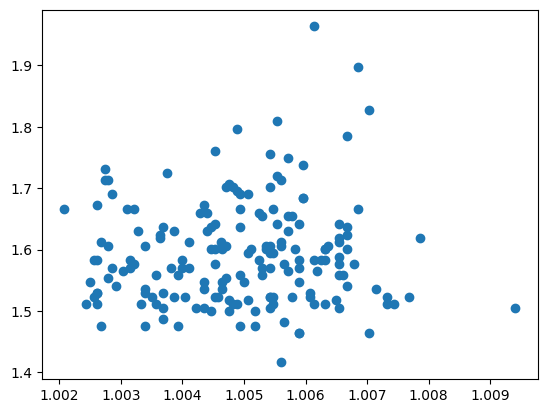

<Figure size 1200x800 with 0 Axes>

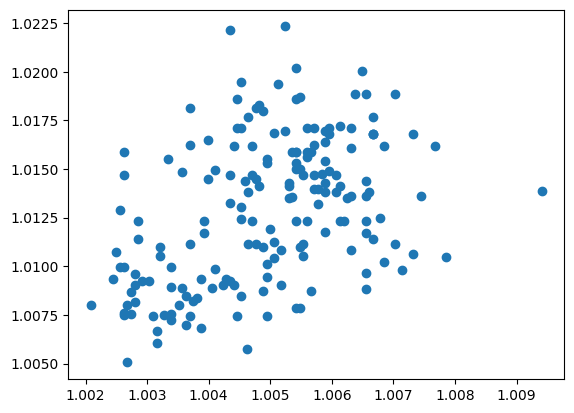

<Figure size 1200x800 with 0 Axes>

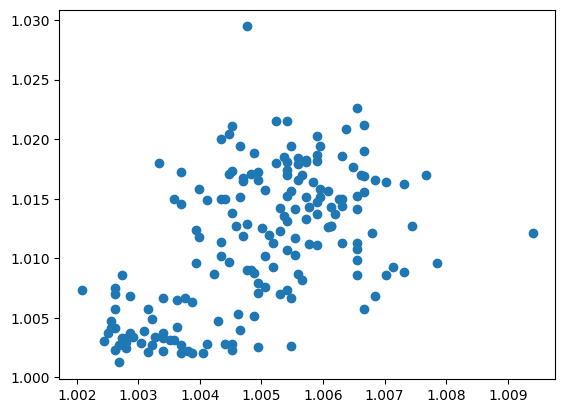

<Figure size 1200x800 with 0 Axes>

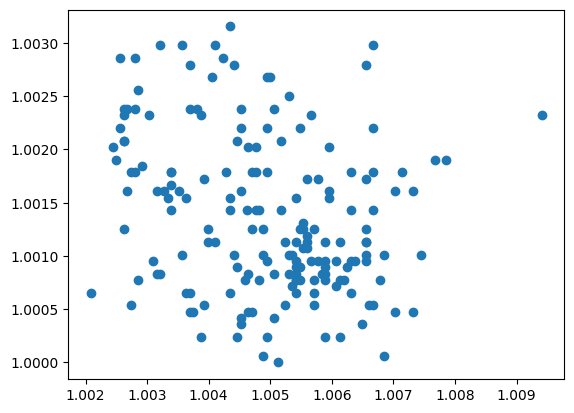

<Figure size 1200x800 with 0 Axes>

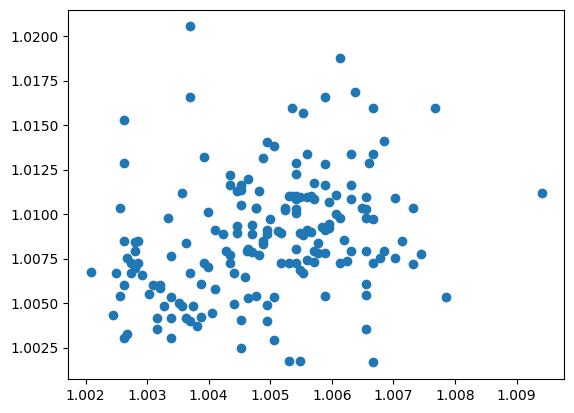

<Figure size 1200x800 with 0 Axes>

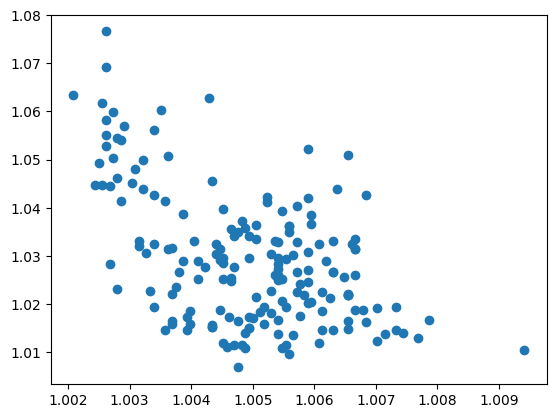

<Figure size 1200x800 with 0 Axes>

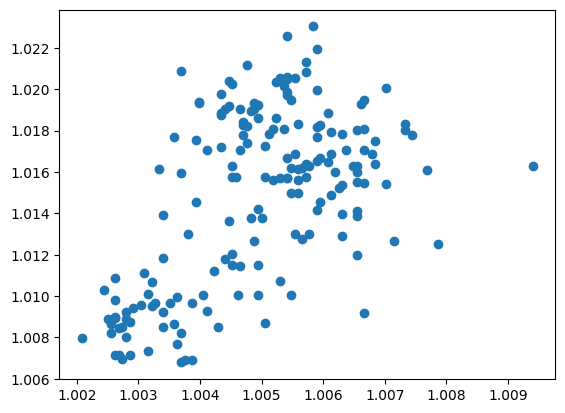

<Figure size 1200x800 with 0 Axes>

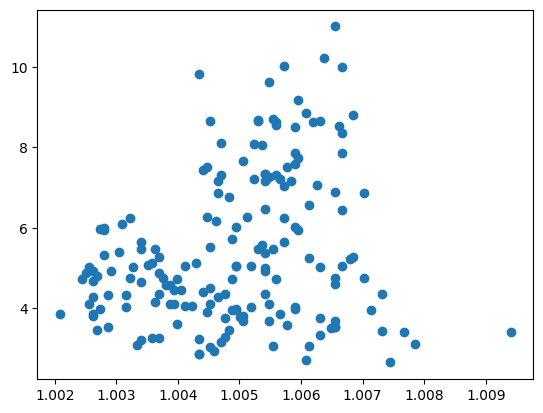

<Figure size 1200x800 with 0 Axes>

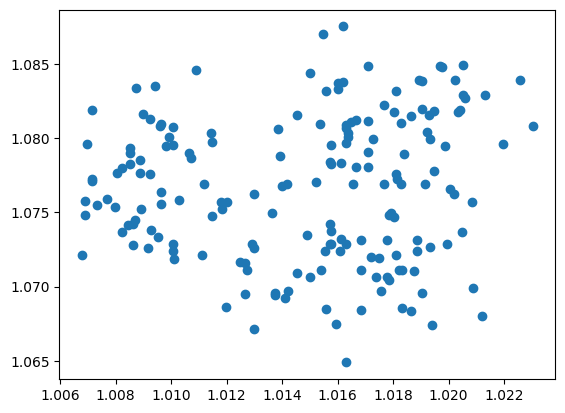

<Figure size 1200x800 with 0 Axes>

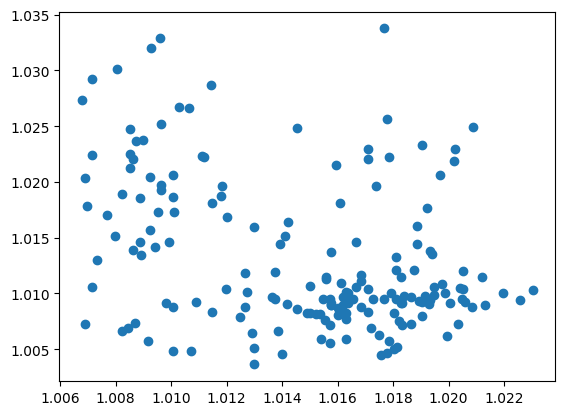

<Figure size 1200x800 with 0 Axes>

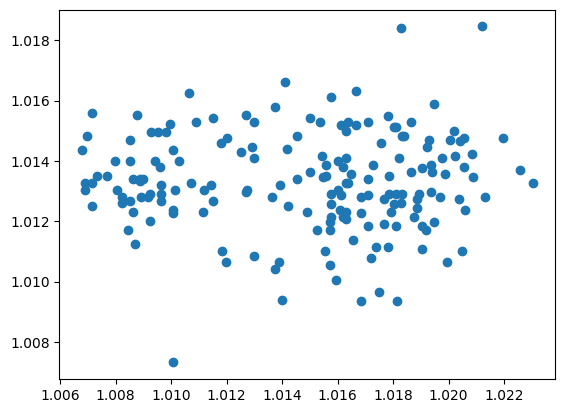

<Figure size 1200x800 with 0 Axes>

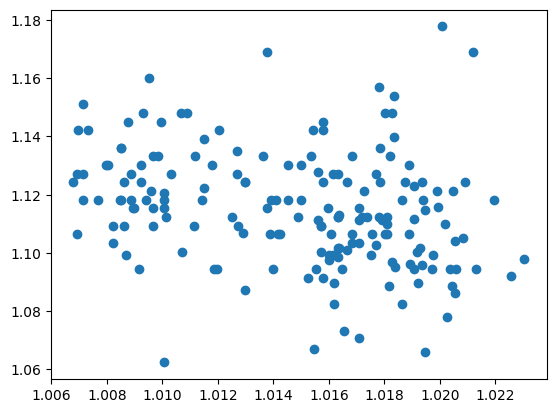

<Figure size 1200x800 with 0 Axes>

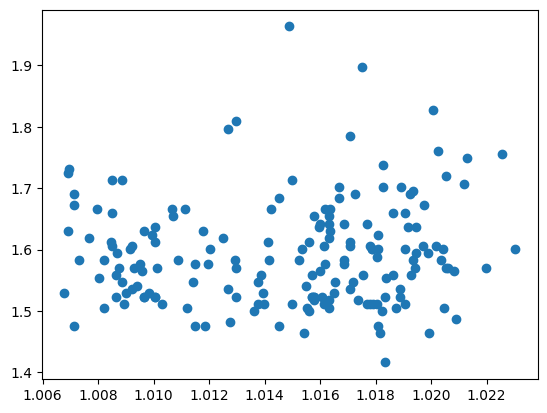

<Figure size 1200x800 with 0 Axes>

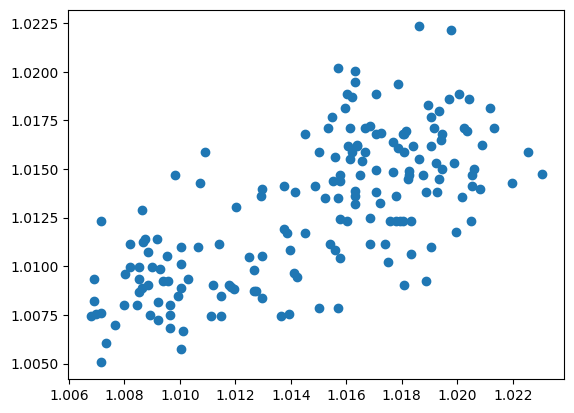

<Figure size 1200x800 with 0 Axes>

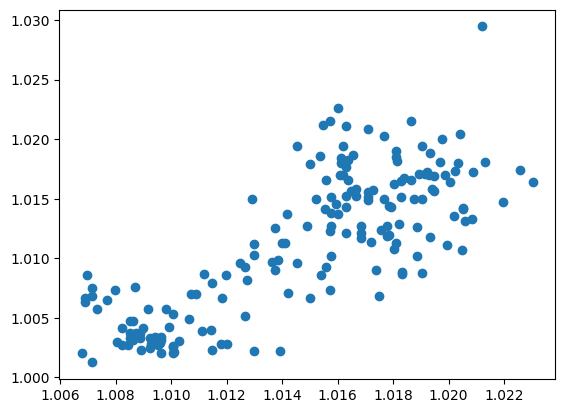

<Figure size 1200x800 with 0 Axes>

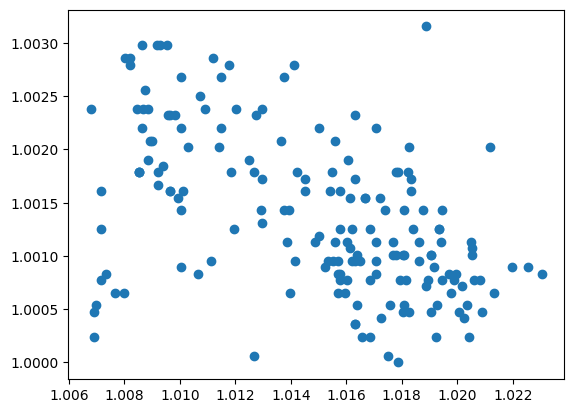

<Figure size 1200x800 with 0 Axes>

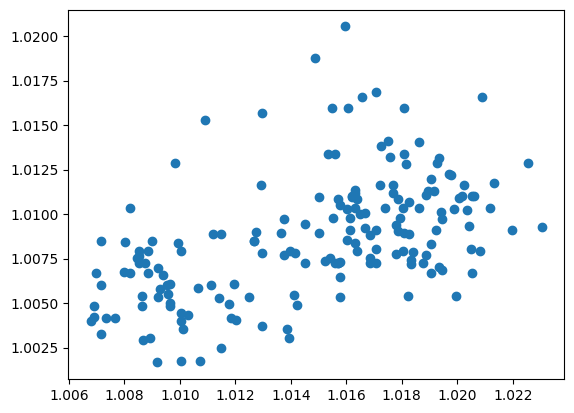

<Figure size 1200x800 with 0 Axes>

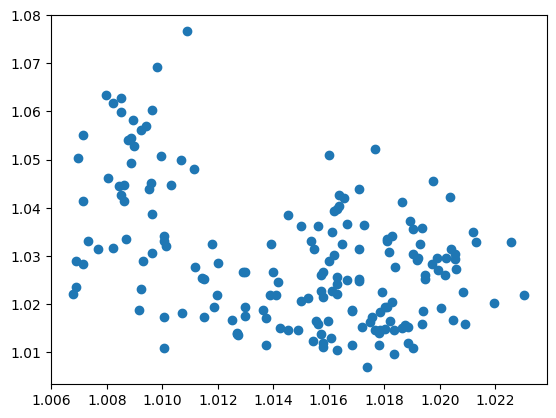

<Figure size 1200x800 with 0 Axes>

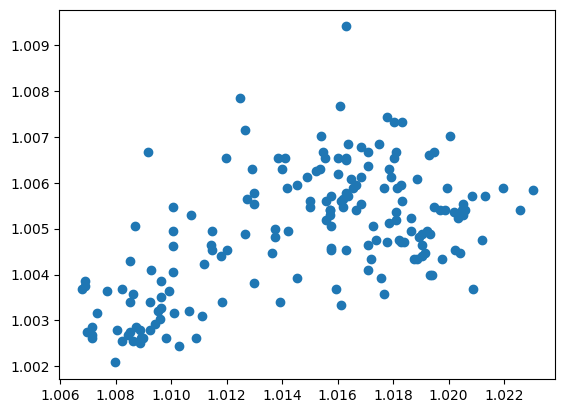

<Figure size 1200x800 with 0 Axes>

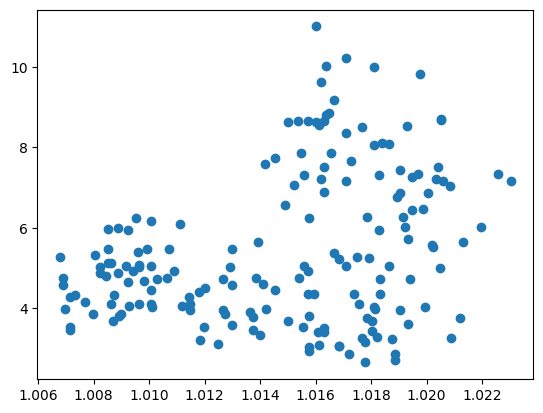

<Figure size 1200x800 with 0 Axes>

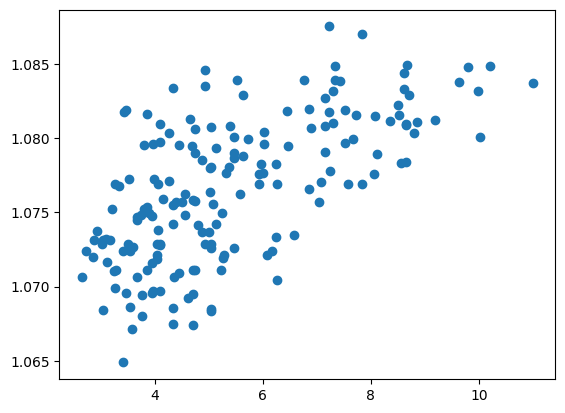

<Figure size 1200x800 with 0 Axes>

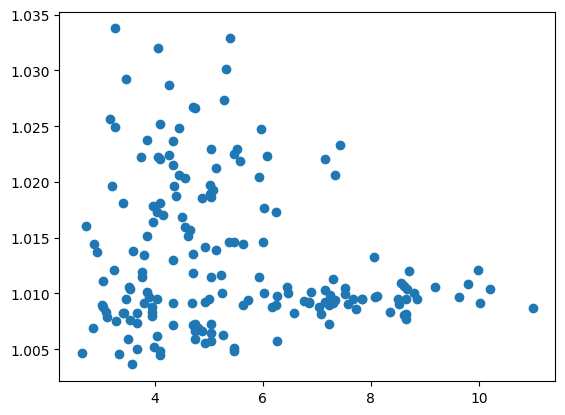

<Figure size 1200x800 with 0 Axes>

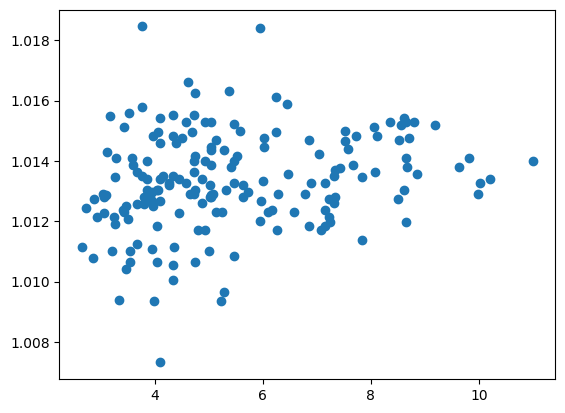

<Figure size 1200x800 with 0 Axes>

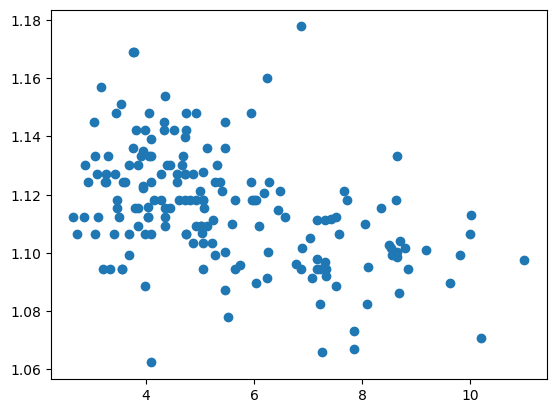

<Figure size 1200x800 with 0 Axes>

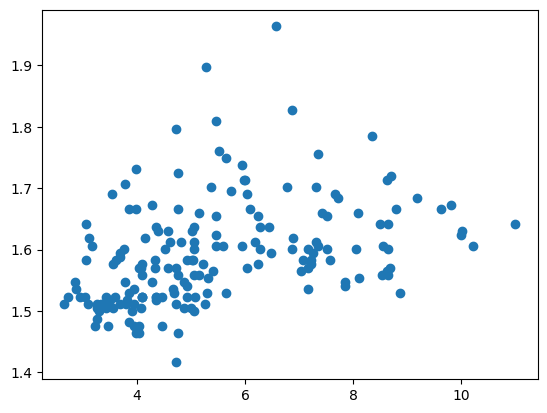

<Figure size 1200x800 with 0 Axes>

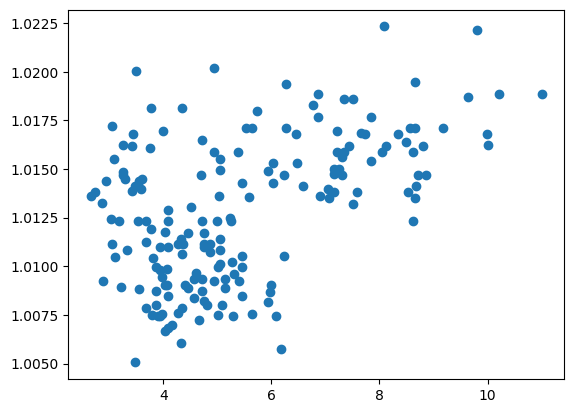

<Figure size 1200x800 with 0 Axes>

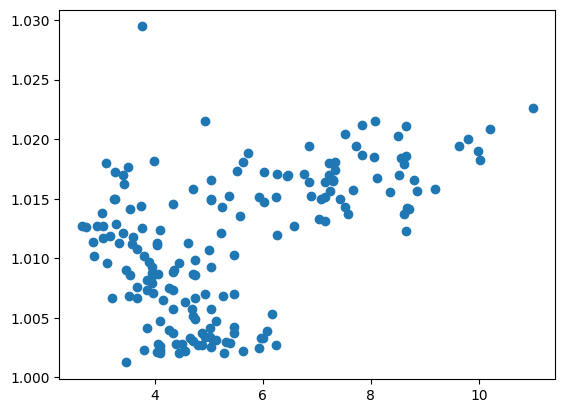

<Figure size 1200x800 with 0 Axes>

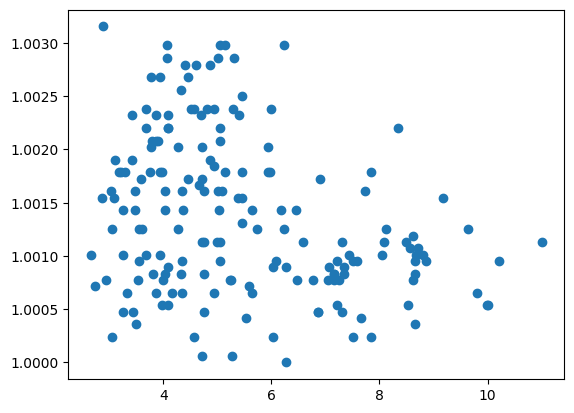

<Figure size 1200x800 with 0 Axes>

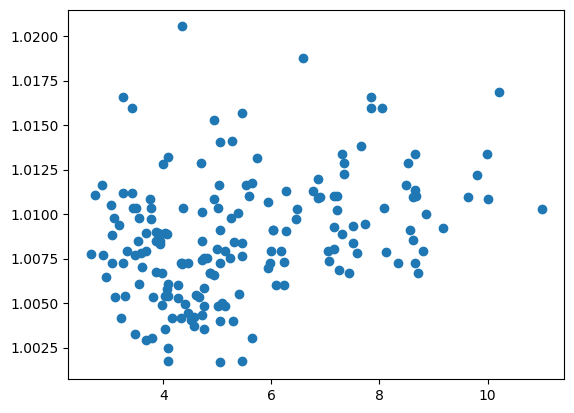

<Figure size 1200x800 with 0 Axes>

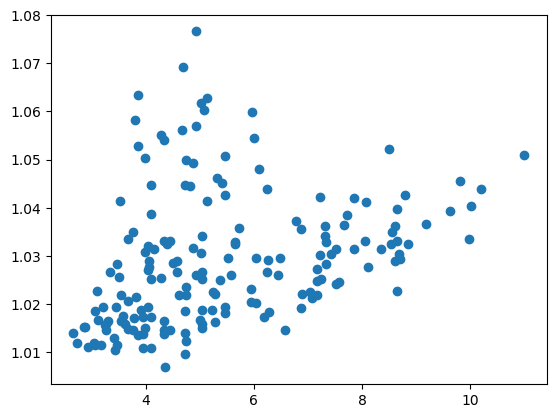

<Figure size 1200x800 with 0 Axes>

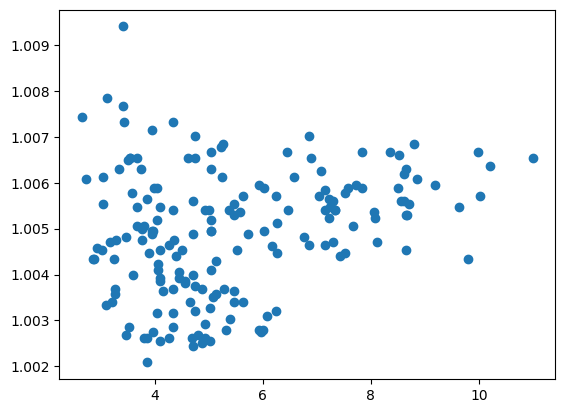

<Figure size 1200x800 with 0 Axes>

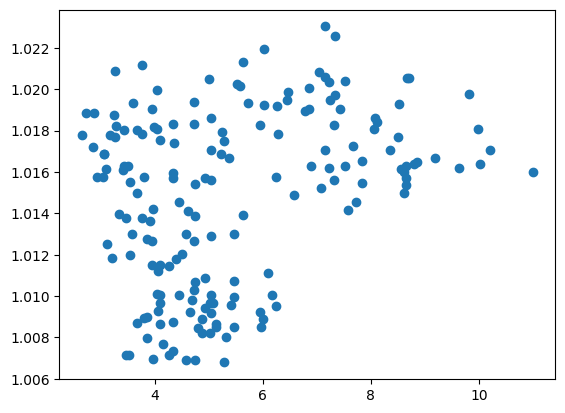

<Figure size 1200x800 with 0 Axes>

In [70]:
for i in range(b):
  for j in range(b):
    if i != j:
      plt.scatter(min_max_scaling(train_array)[:,i], min_max_scaling(train_array)[:,j])
      plt.figure(figsize = (12, 8))
      plt.show()

# Elbow Method

In [72]:
i=1
J_hist=[]
Iter = []

In [73]:
for j in range(1, 20):
  centroids = random_centroids(train_norm, j)
  old_centroids = pd.DataFrame()
  i = 1

  while i < max_iters and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_distance(train_norm, centroids)
    centroids = new_centroids(train_norm, labels, j)
    i += 1

  Iter.append(i)
  cost = cost_function(train_array, centroids, labels)
  J_hist.append(cost)


In [74]:
J_hist

[660530.4501358183,
 660404.361601909,
 659115.7787920563,
 658917.8971755881,
 658990.2791986518,
 658927.3788073515,
 658909.6522661246,
 658907.8349759548,
 658900.7182854089,
 658737.9021976303,
 658841.8645345564,
 658844.7662756173,
 658755.8467018016,
 658841.5074201329,
 658744.6193930235,
 658745.6268732436,
 658905.560209711,
 658713.3965021836,
 658639.533266985]

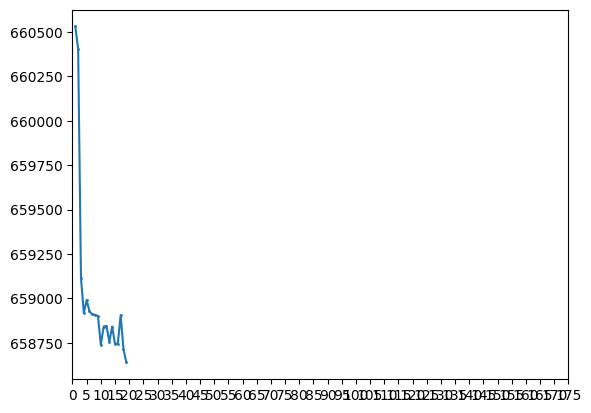

<Figure size 9600x3200 with 0 Axes>

In [75]:
plt.plot(range(1, 20), J_hist, marker='.',markersize=2)
plt.xticks(range(0, a + 1, 5))
plt.figure(figsize = (96, 32))
plt.show()